# 1. Loading and Exploring the Data

Dataset Overview:
Number of rows: 7043
Number of columns: 21

Column names and data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

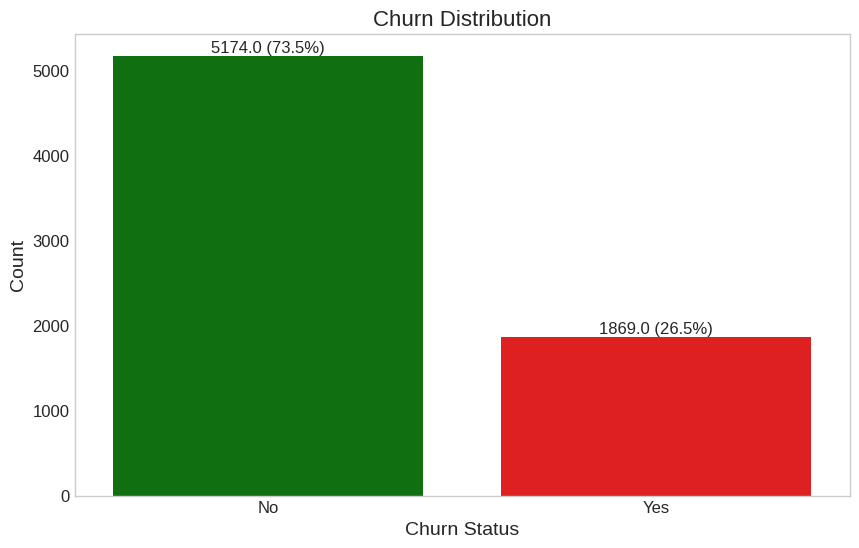

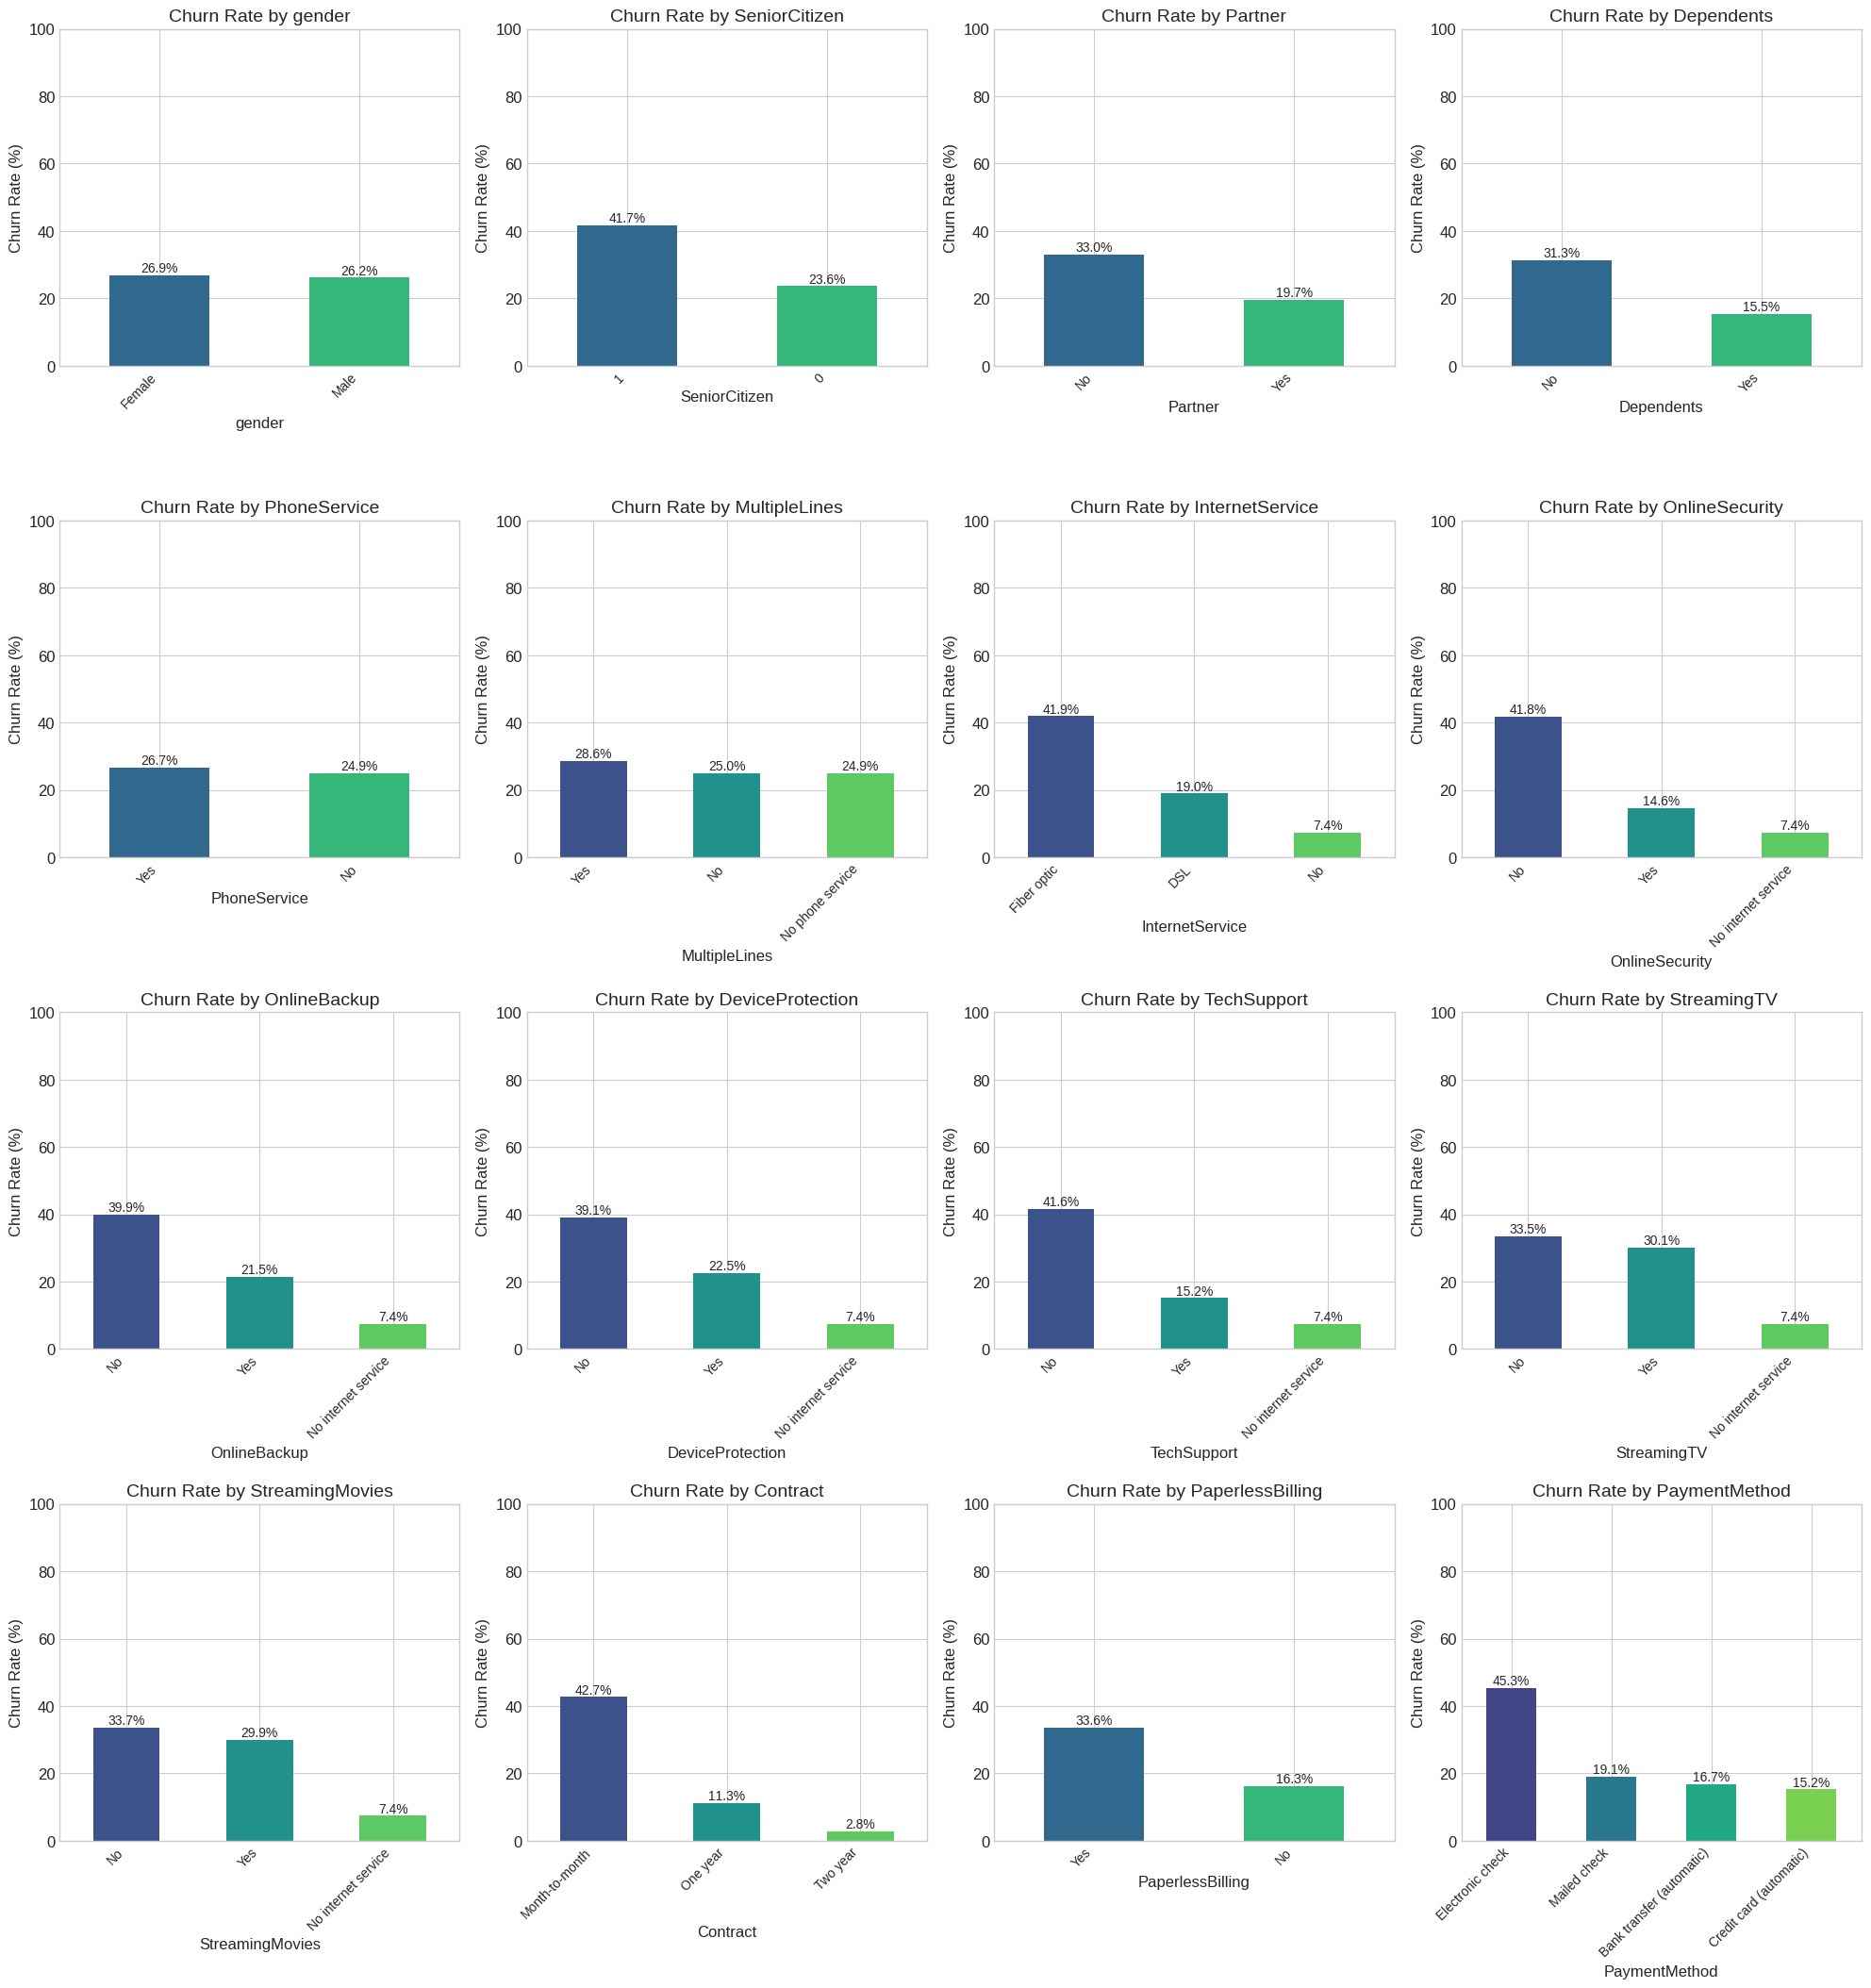

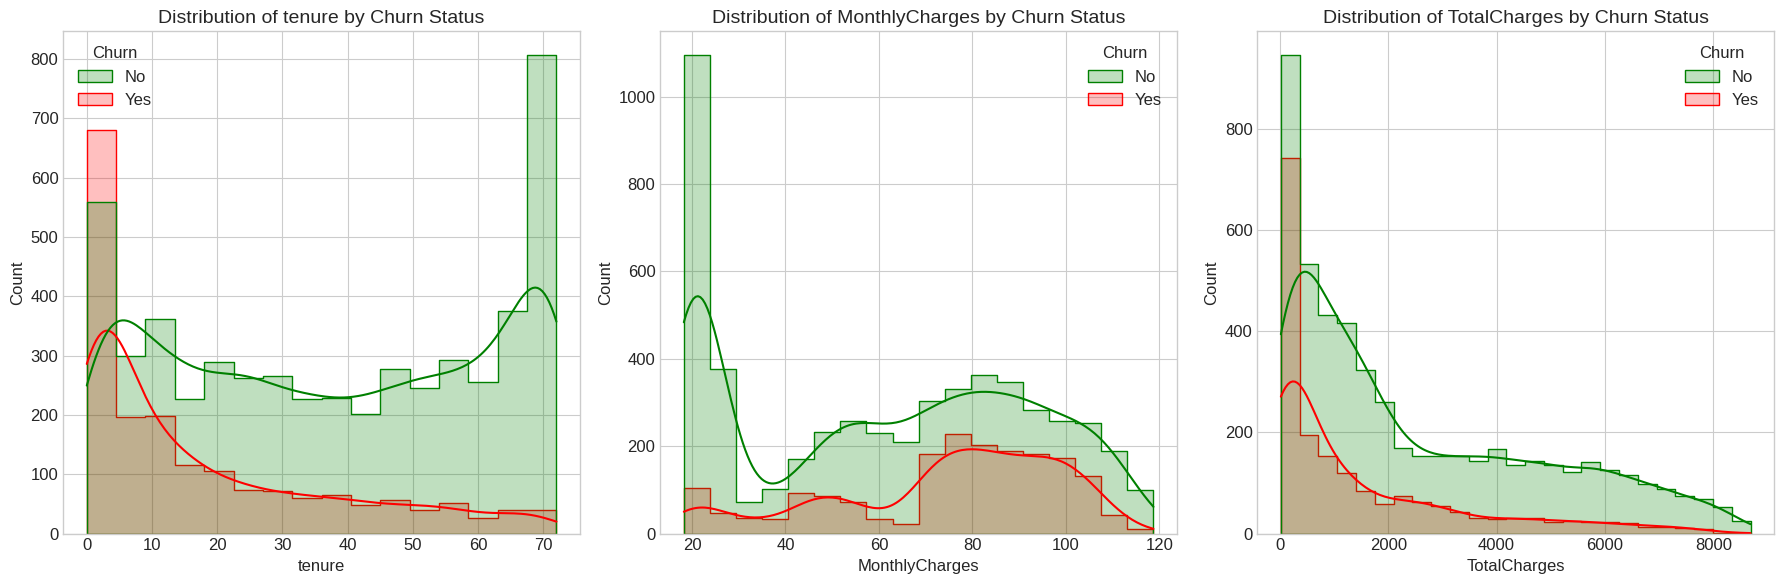

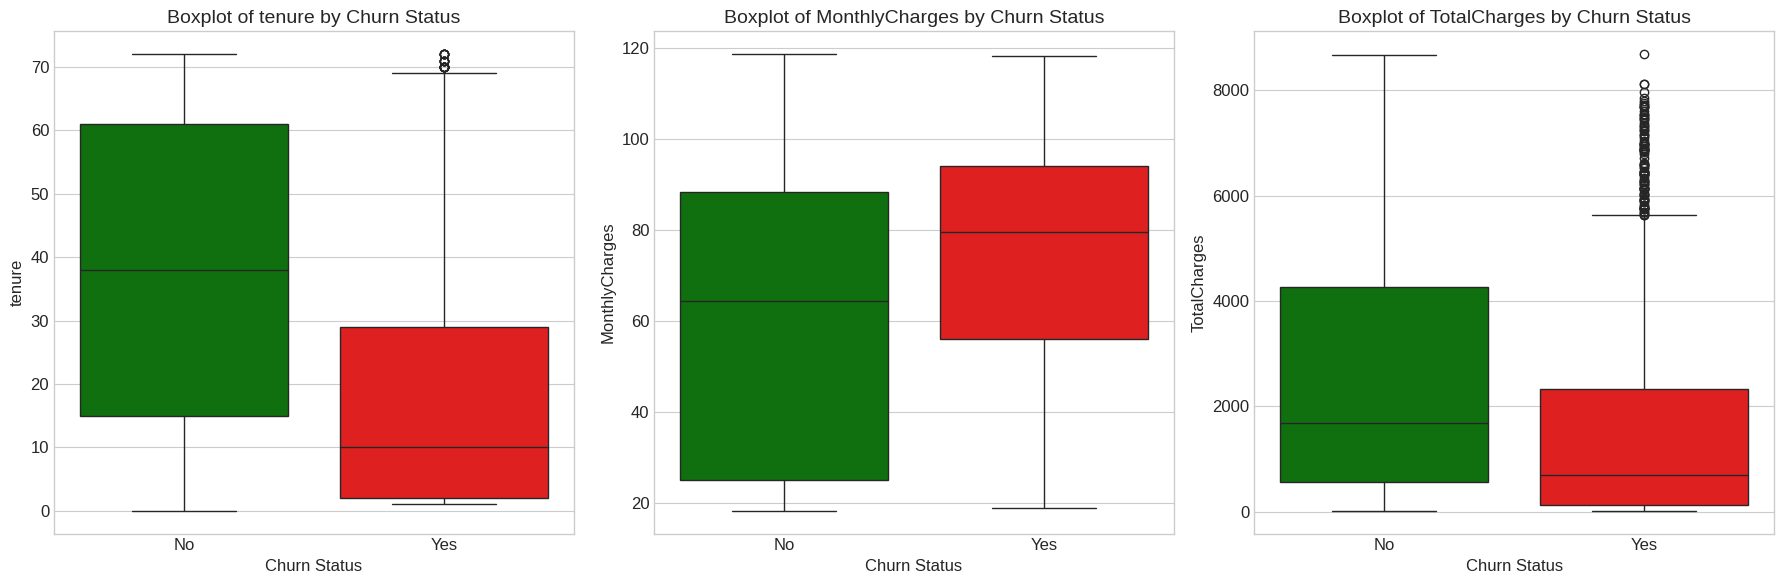

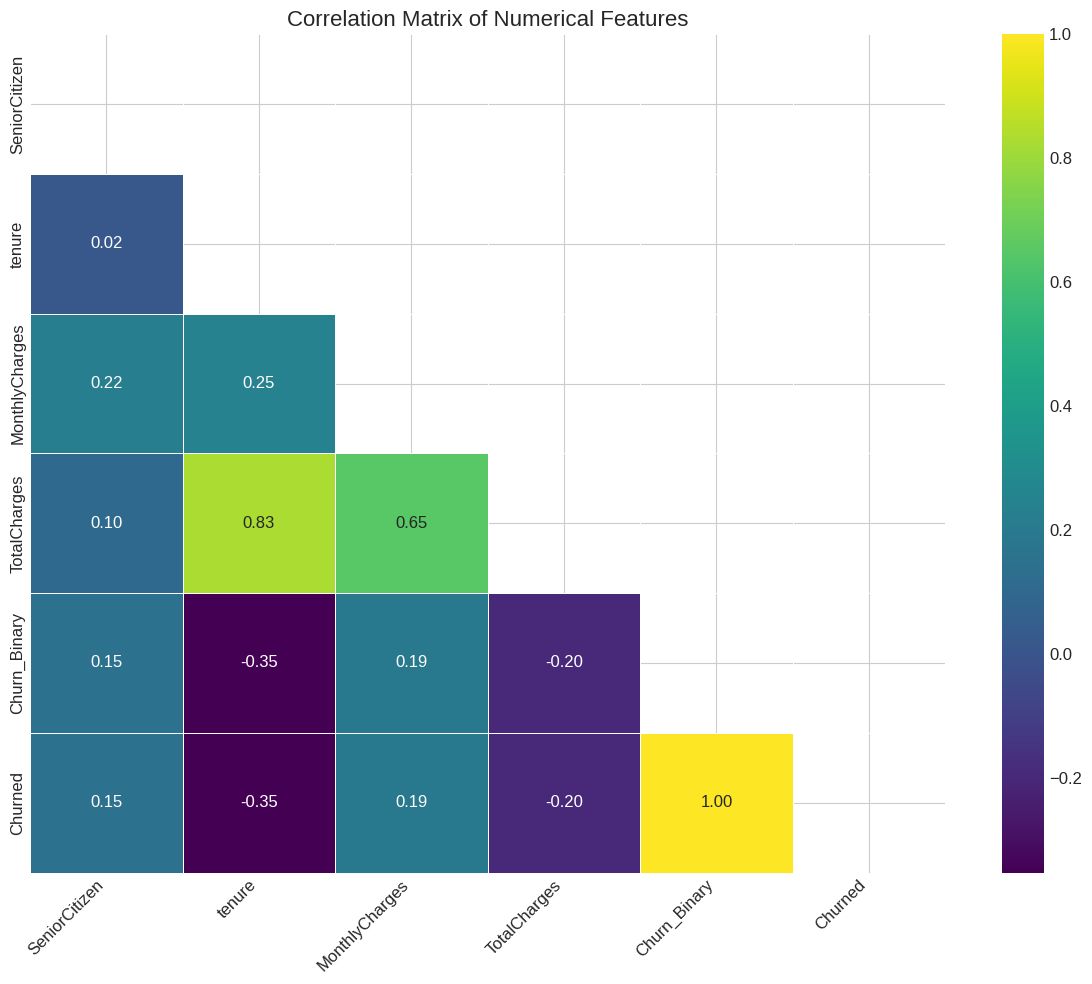



# 4. Advanced Churn Analysis


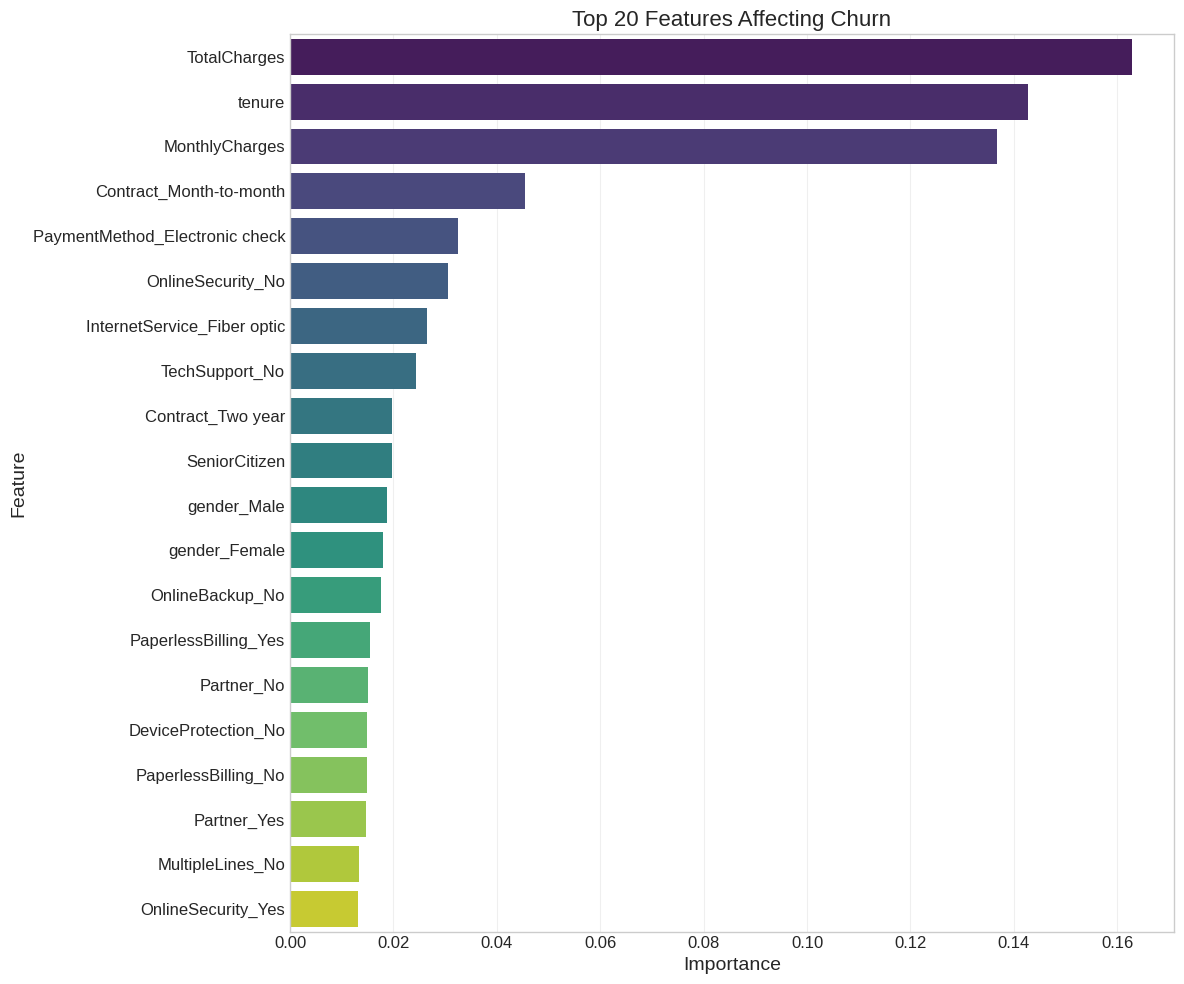


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



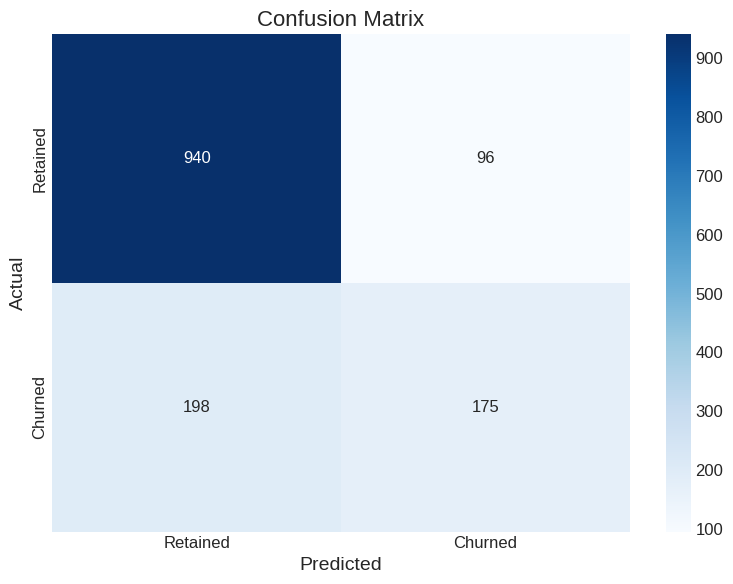

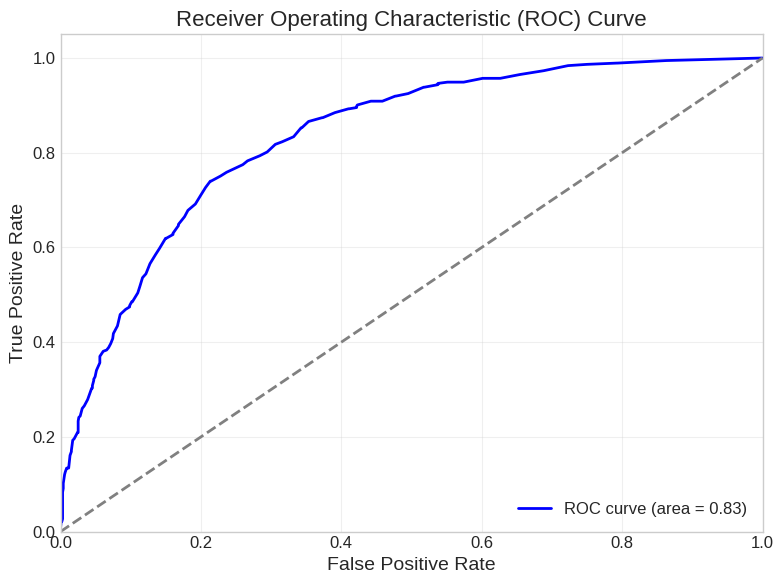



# 5. Survival Analysis


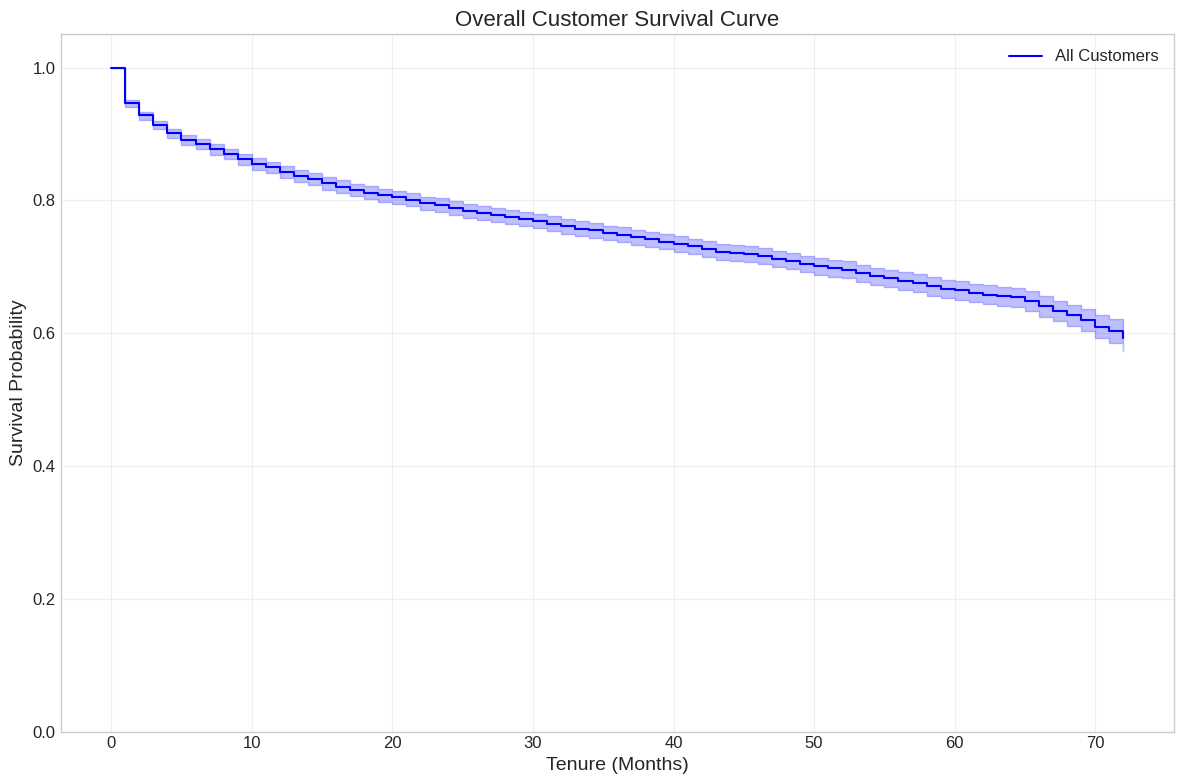


Median Survival Time (months): inf


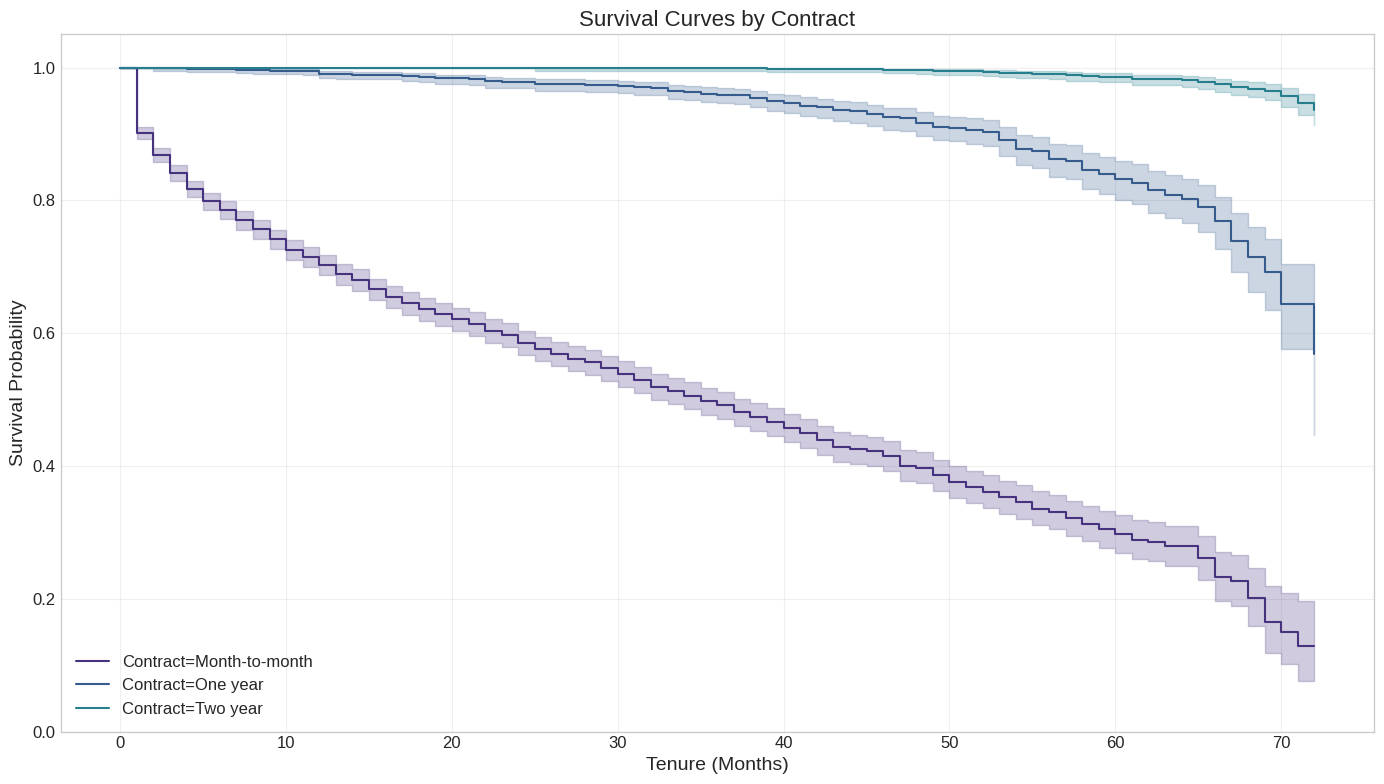


Log-rank test for Contract:
  Month-to-month vs One year: p-value = 0.00000
  Month-to-month vs Two year: p-value = 0.00000
  One year vs Two year: p-value = 0.00000


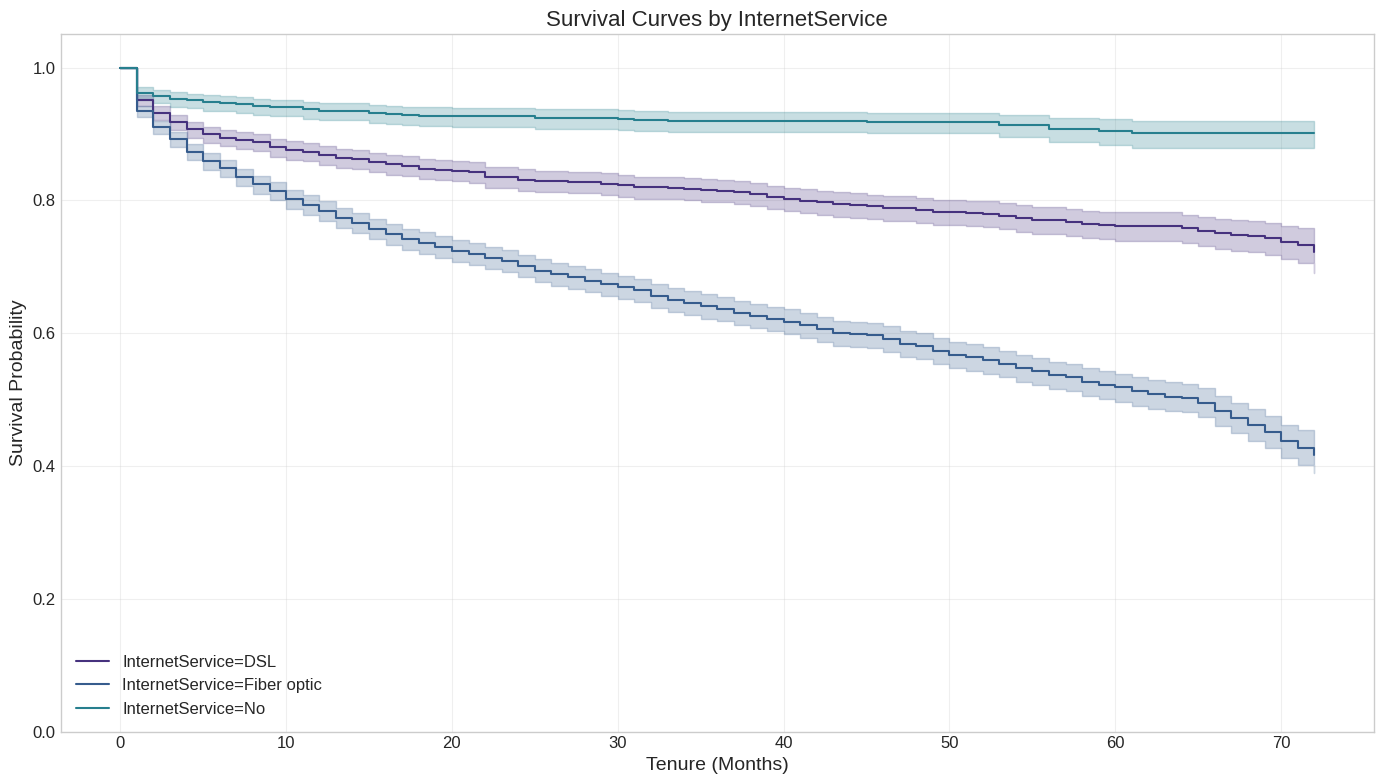


Log-rank test for InternetService:
  DSL vs Fiber optic: p-value = 0.00000
  DSL vs No: p-value = 0.00000
  Fiber optic vs No: p-value = 0.00000


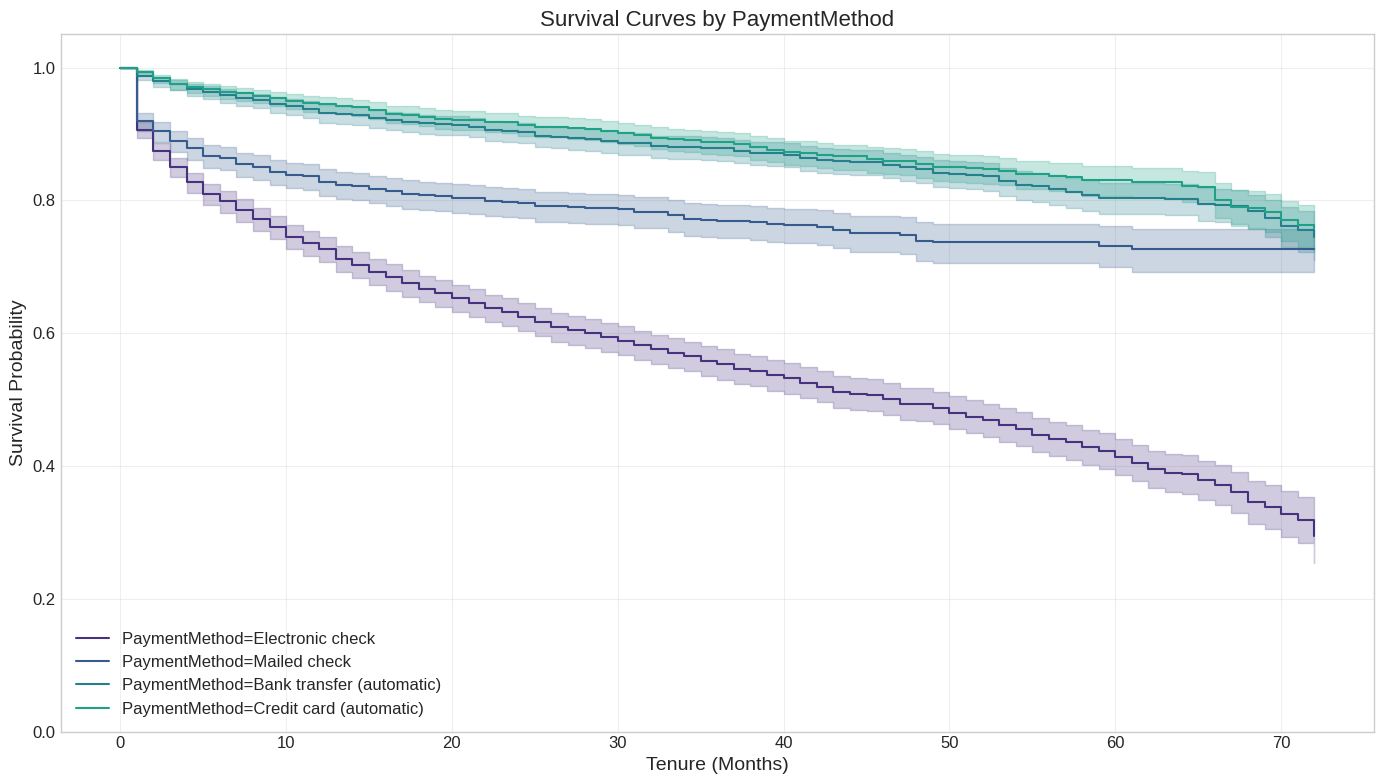


Log-rank test for PaymentMethod:
  Electronic check vs Mailed check: p-value = 0.00000
  Electronic check vs Bank transfer (automatic): p-value = 0.00000
  Electronic check vs Credit card (automatic): p-value = 0.00000
  Mailed check vs Bank transfer (automatic): p-value = 0.00000
  Mailed check vs Credit card (automatic): p-value = 0.00000
  Bank transfer (automatic) vs Credit card (automatic): p-value = 0.35143


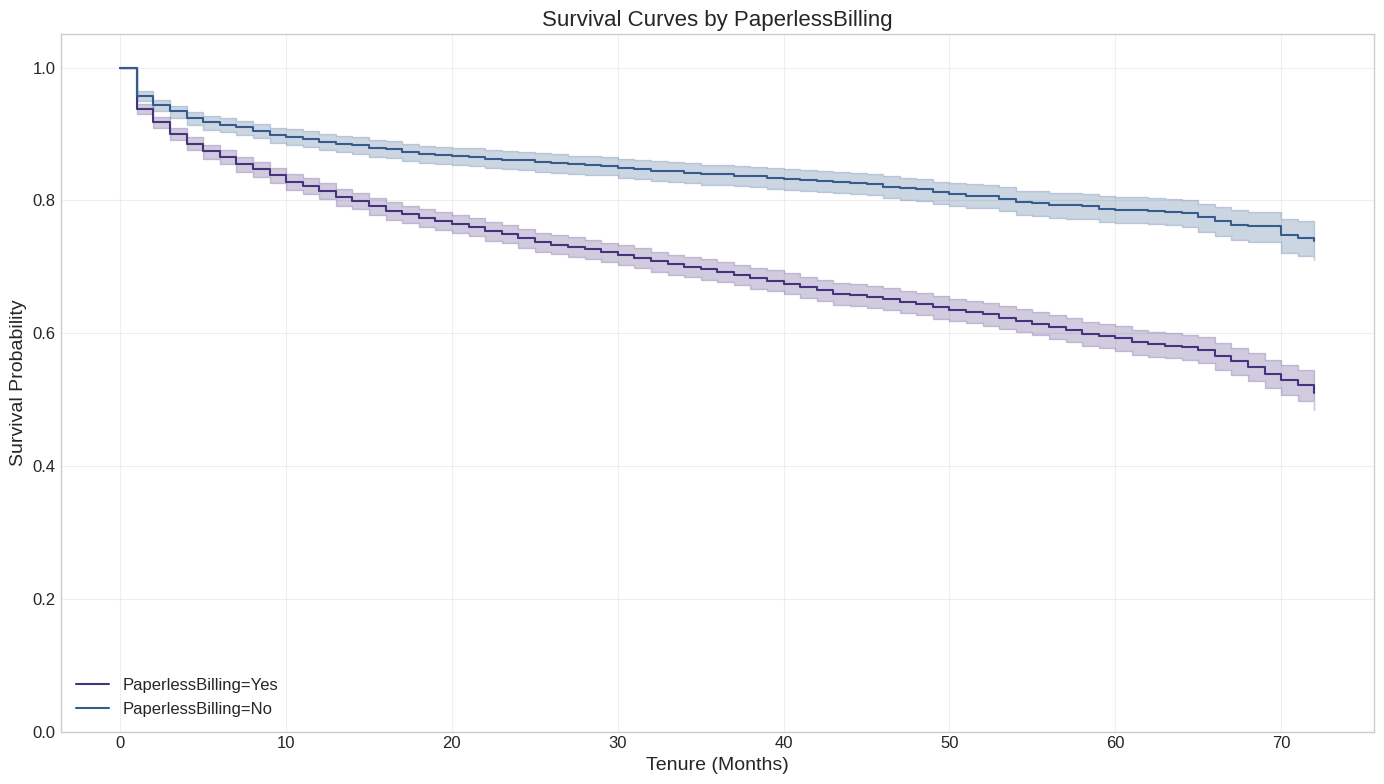


Log-rank test for PaperlessBilling:
  Yes vs No: p-value = 0.00000


# 6. Hazard Analysis

Calculating Cumulative Hazard Function...


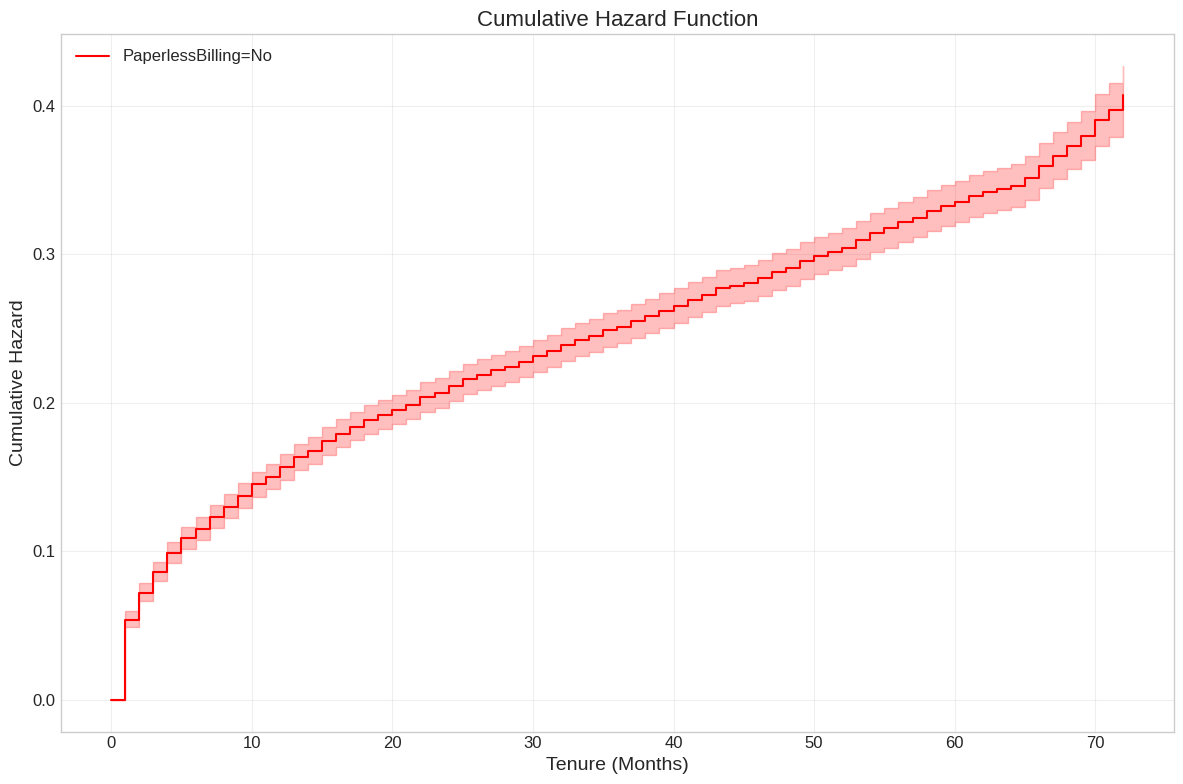

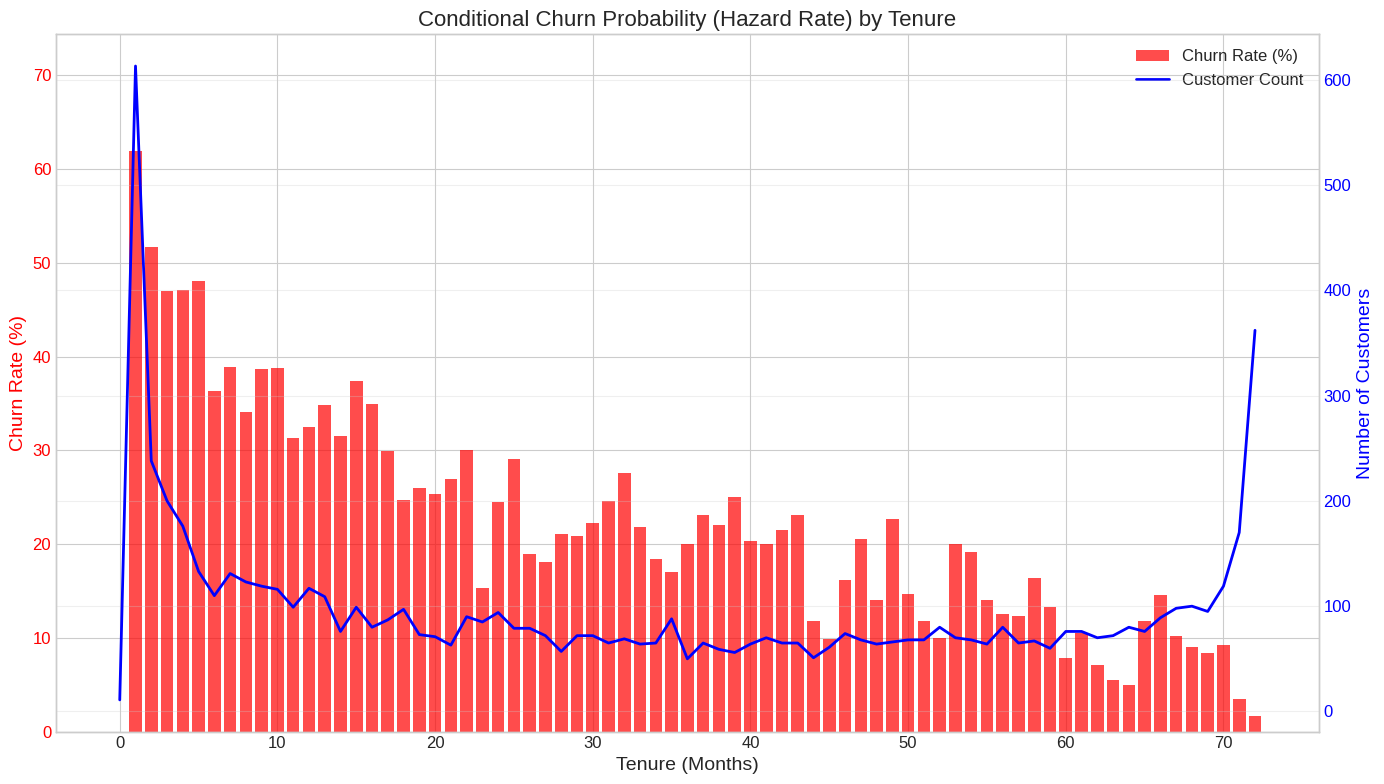


Fitting Cox Proportional Hazards Model...

Checking correlation between numerical features:
                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651182
TotalCharges          0.651182      1.000000

Using 15 features for Cox model (excluding tenure and Churned)

Fitting Cox model with L2 regularization...

Cox Proportional Hazards Model Summary (with regularization):
                                           coef  exp(coef)  se(coef)  \
covariate                                                              
MonthlyCharges                         0.002889   1.002893  0.001001   
TotalCharges                          -0.000401   0.999599  0.000013   
SeniorCitizen                          0.048718   1.049924  0.048594   
Contract_One year                     -0.711361   0.490976  0.057641   
Contract_Two year                     -1.131698   0.322485  0.065481   
InternetService_Fiber optic            0.536782   1.710493  0.051596   
InternetService_No      

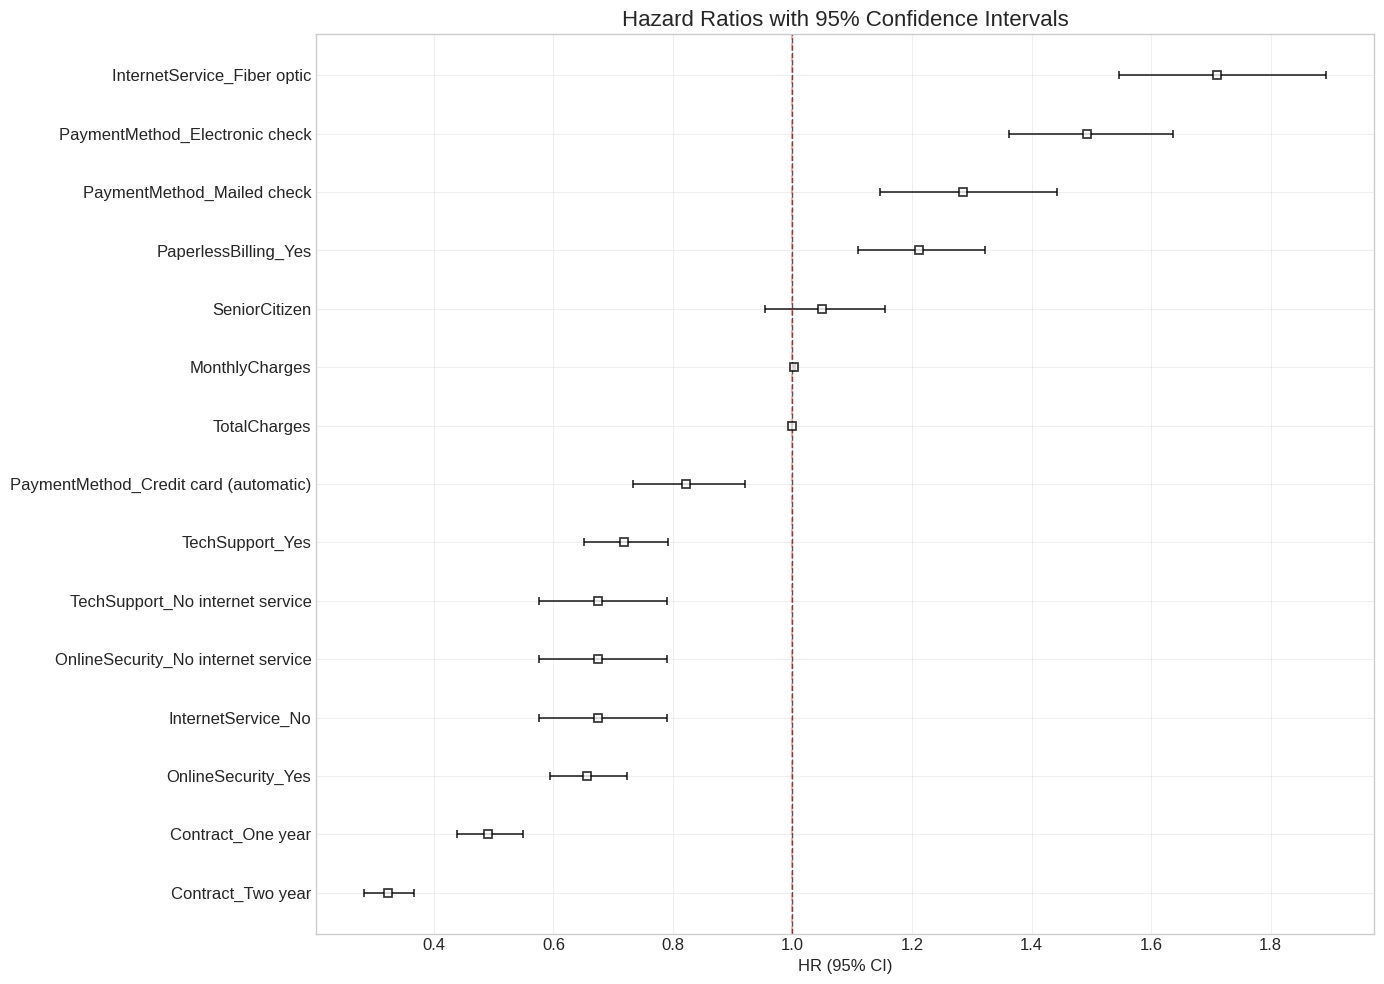

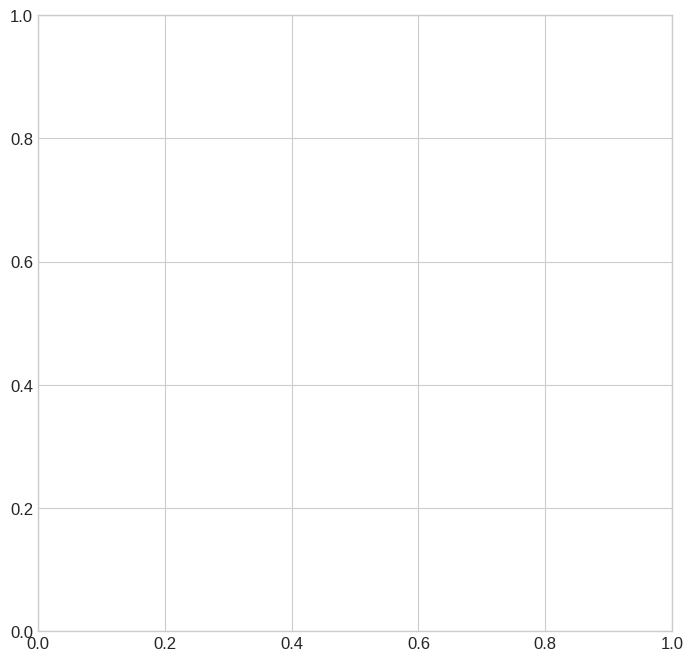

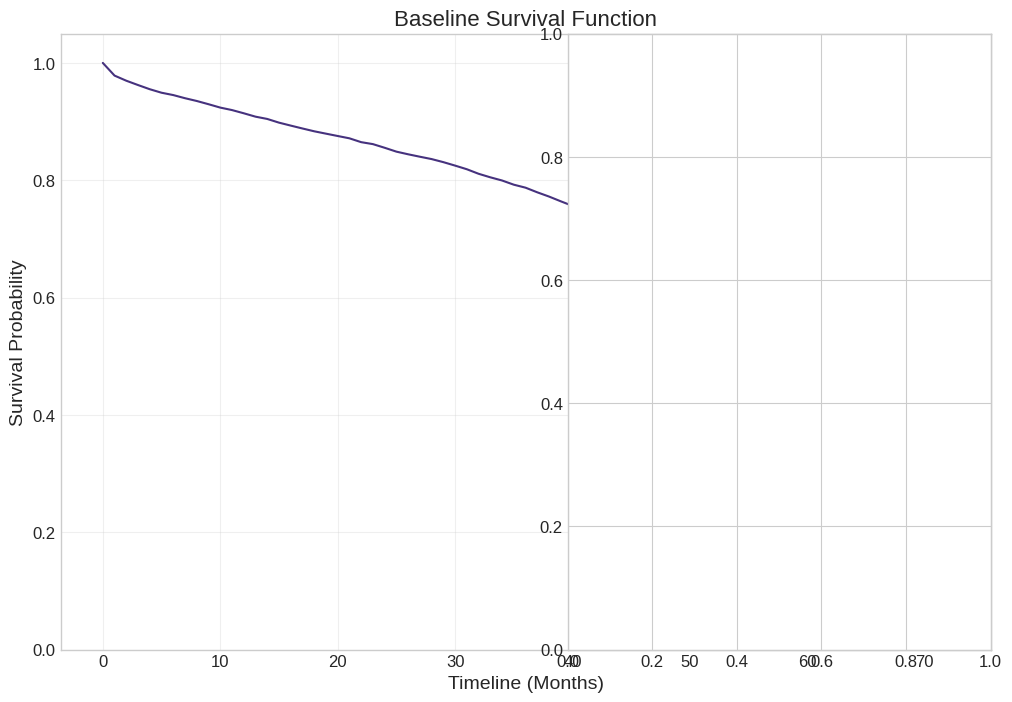

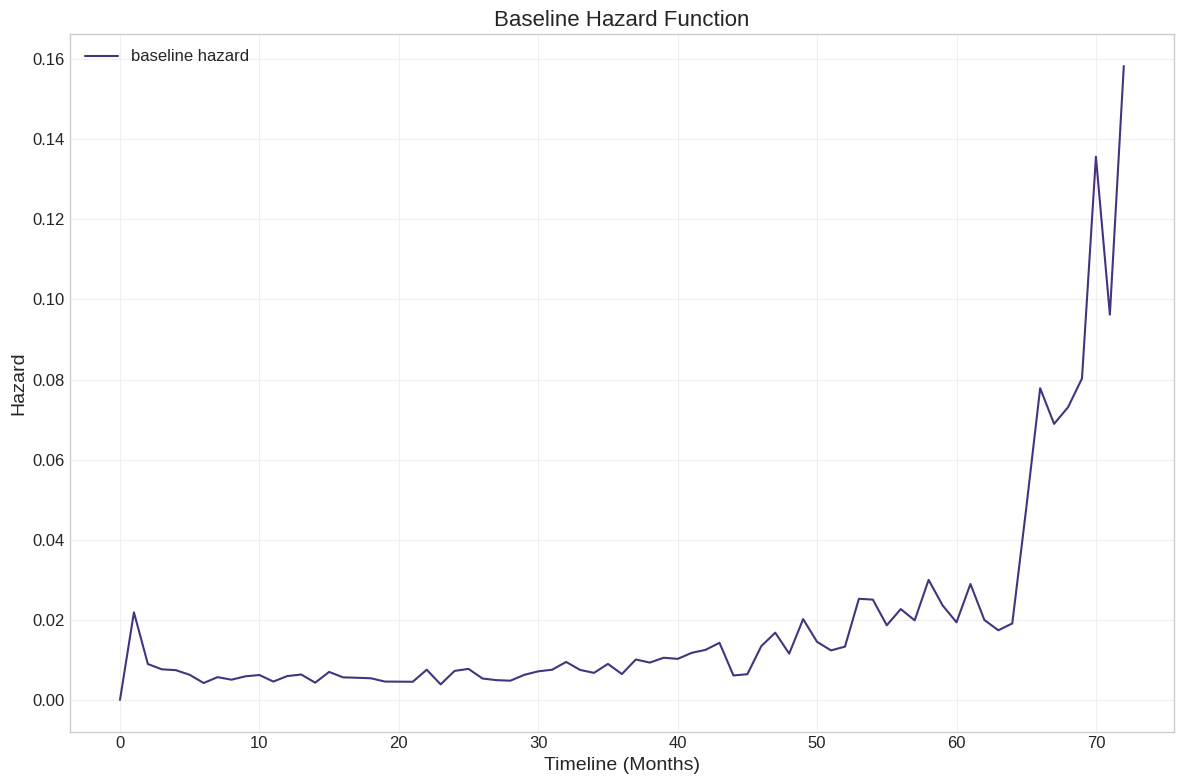



# 7. Predictive Survival Analysis


<Figure size 1400x800 with 0 Axes>

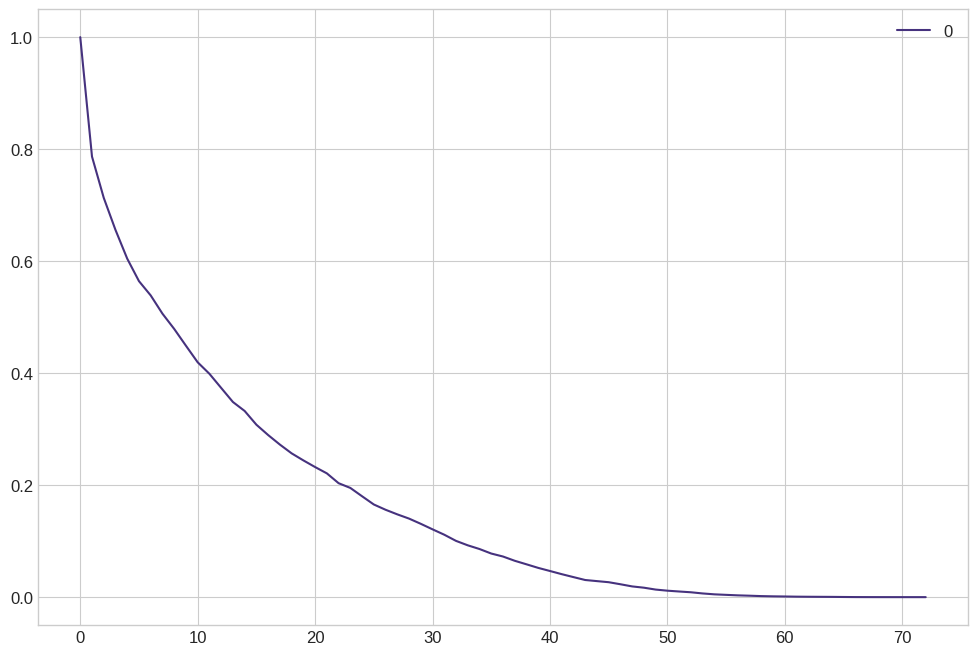

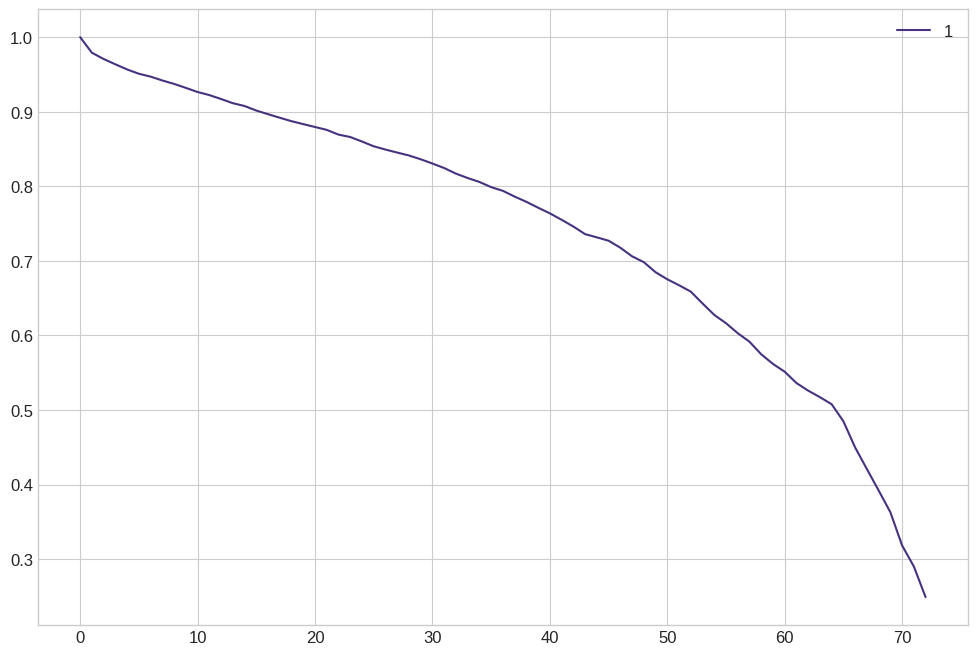

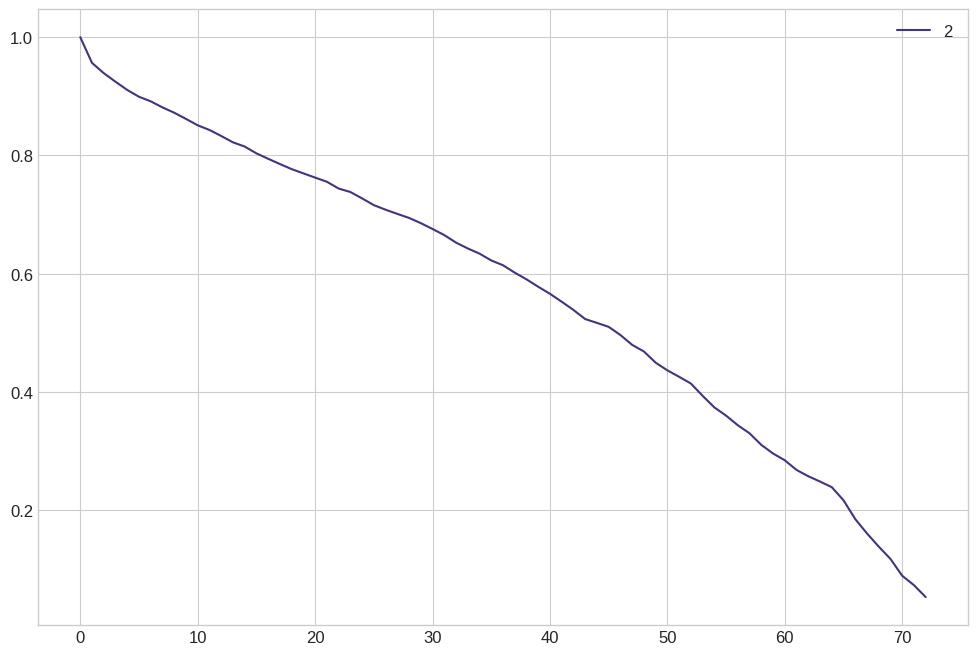

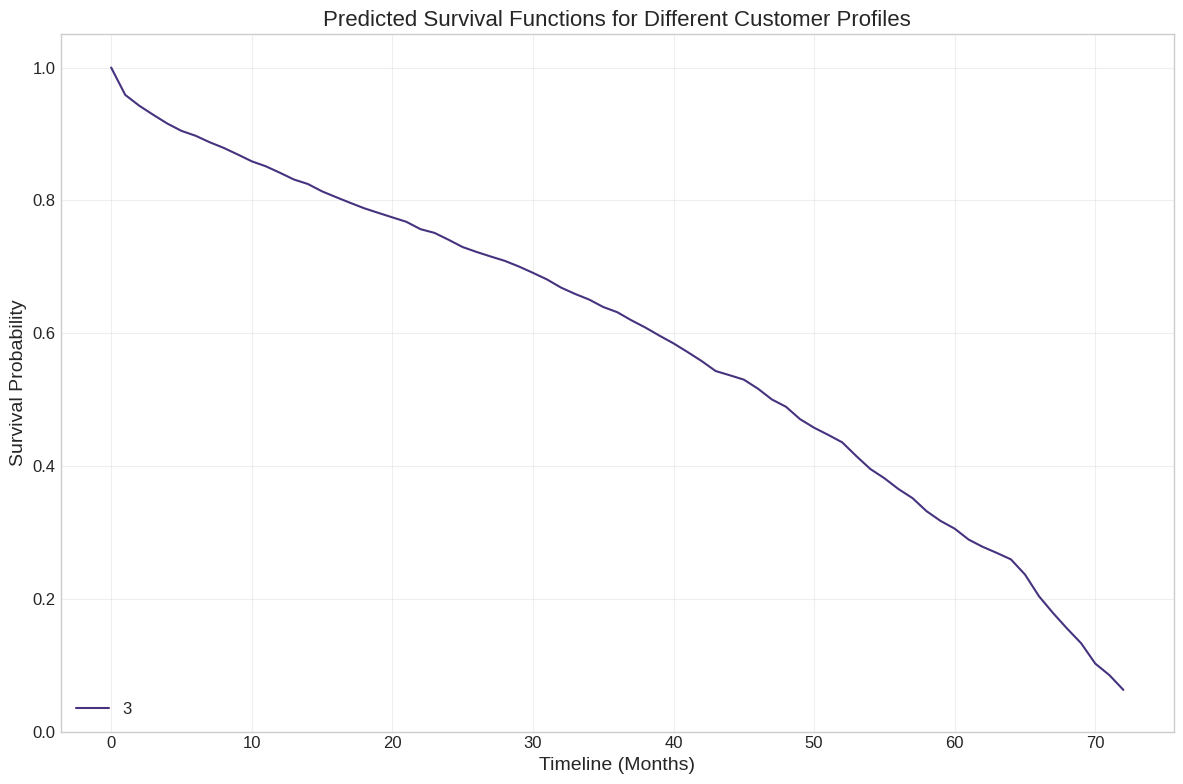


Predicted Median Survival Times (months):
  Month-to-Month, Fiber, High Charge: 8.00
  Two Year, DSL, Low Charge: 65.00
  Month-to-Month, No Internet: 46.00
  One Year, Fiber, Medium Charge: 48.00


<Figure size 1400x800 with 0 Axes>

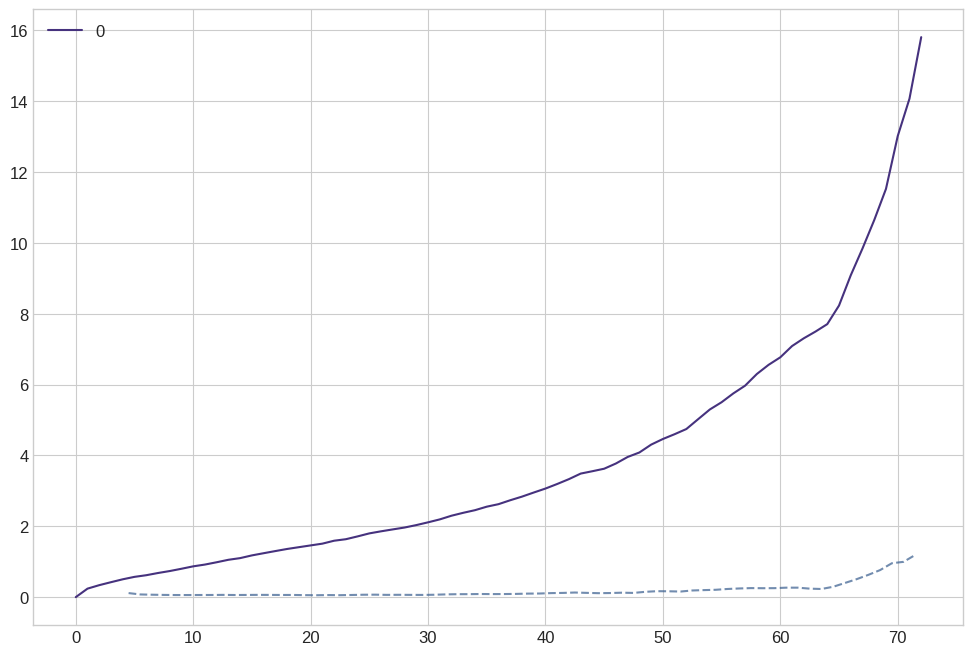

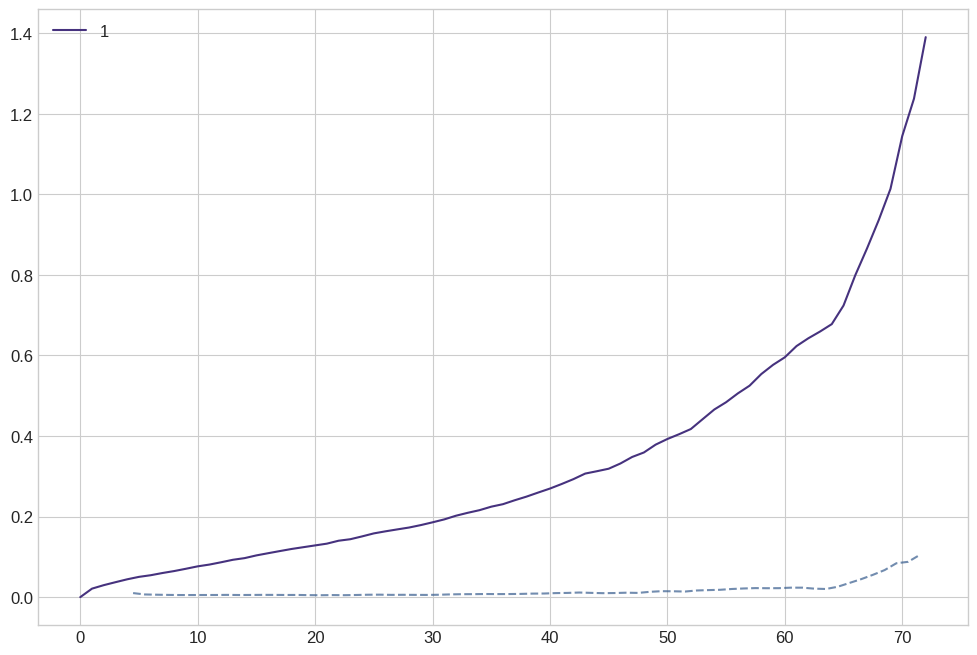

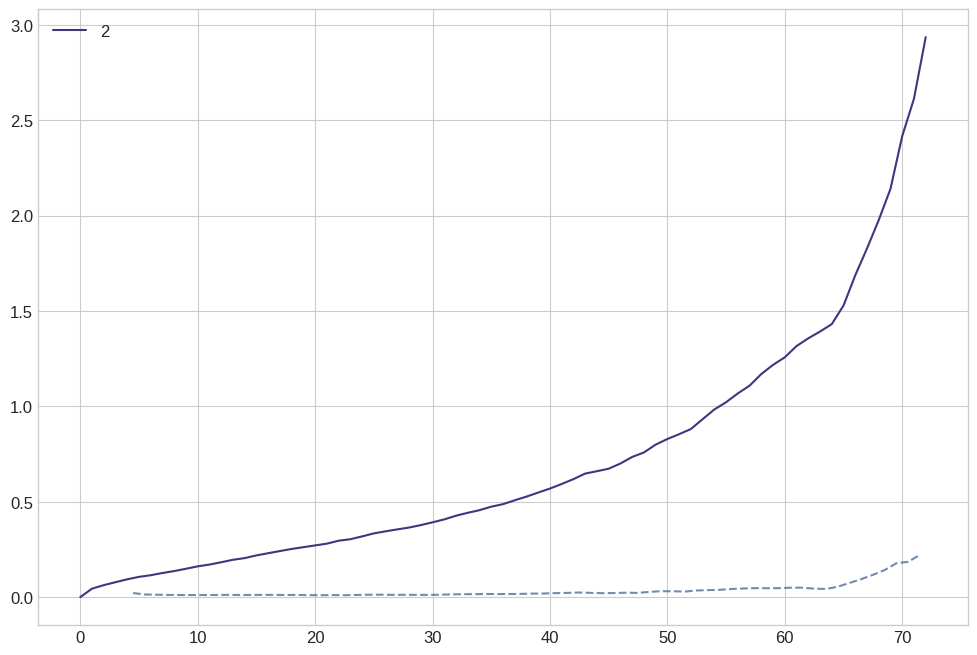

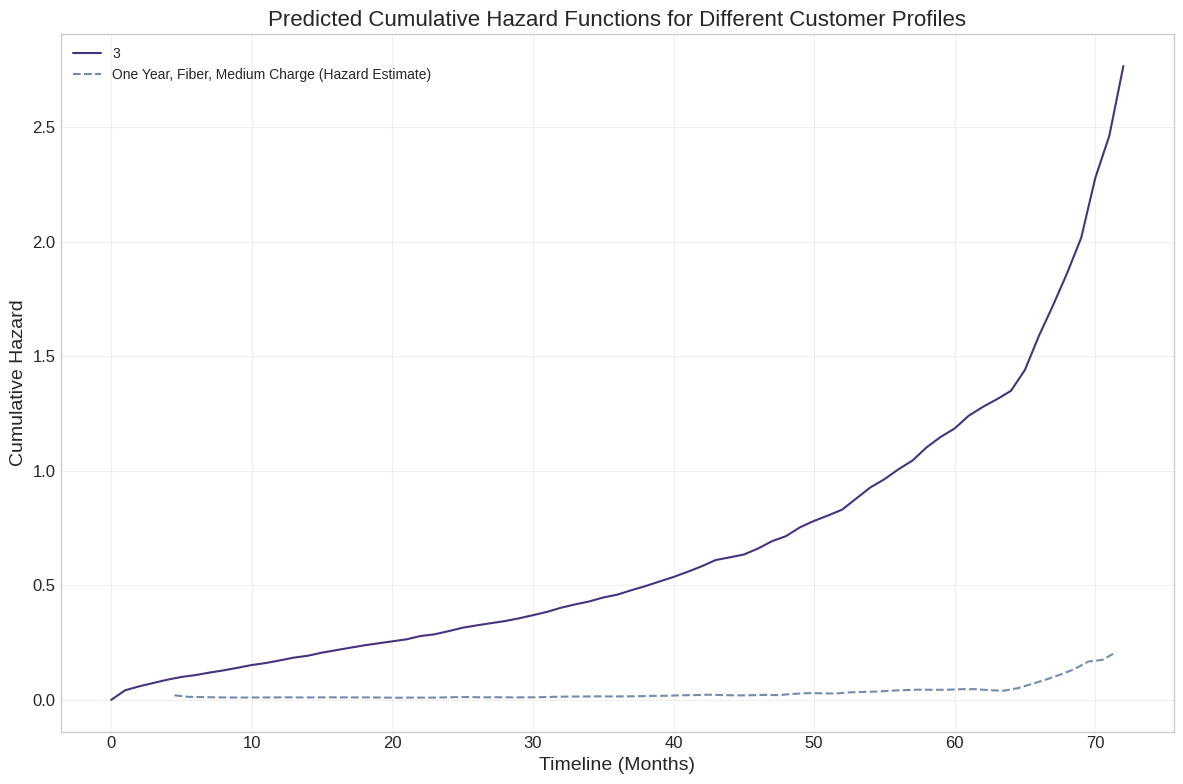



# 8. Parametric Survival Models

Found 11 customers with zero tenure.
Adding a small positive value (0.1) to zero tenure values for parametric modeling.

Fitting Log-Normal Survival Model...


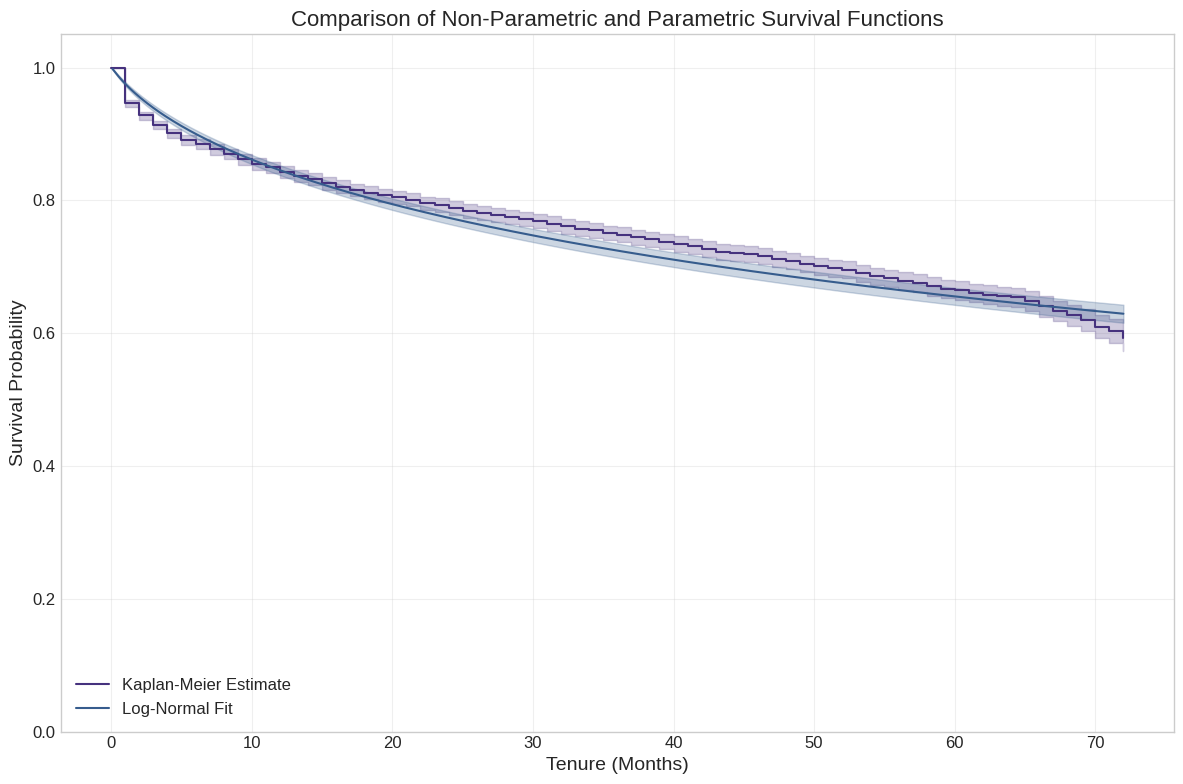


Log-Normal Model Parameters:
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to          z  \
mu_     5.137041  0.057629        5.024090        5.249992     0.0  89.139974   
sigma_  2.607737  0.047627        2.514391        2.701083     1.0  33.757184   

                    p    -log2(p)  
mu_      0.000000e+00         inf  
sigma_  8.386825e-250  827.413899  

Fitting alternative parametric models for comparison...


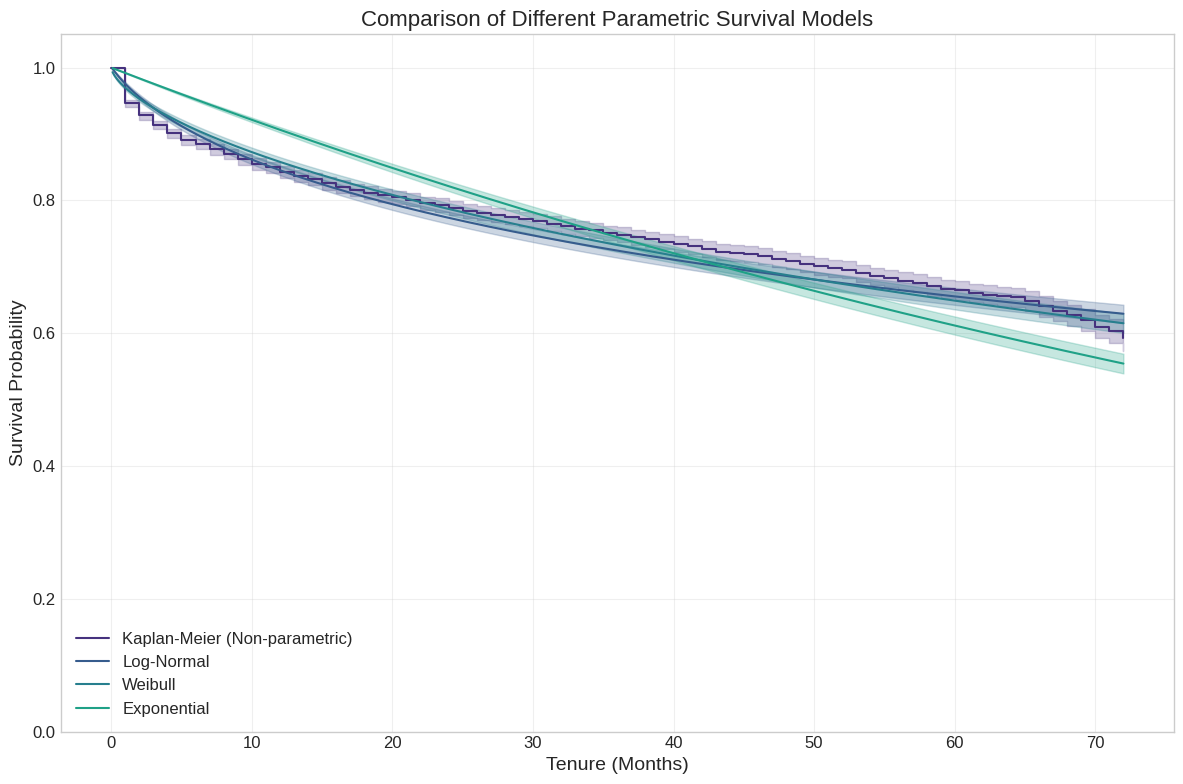


Model Comparison (AIC - lower is better):
Log-Normal AIC: 21041.17673566853
Weibull AIC: 21156.727032553816
Exponential AIC: 21696.989655592384

Best fitting model based on AIC: Log-Normal


# 9. Customer Lifetime Value Analysis

Expected Customer Lifetime by Segment (months):
  Contract=Month-to-month: 33.15
  Contract=One year: 57.26
  Contract=Two year: 59.85

Expected Customer Lifetime by Internet Service (months):
  InternetService=DSL: 49.77
  InternetService=Fiber optic: 41.02
  InternetService=No: 55.59

Calculating Customer Lifetime Value (CLV)...

Customer Lifetime Value Summary Statistics:
count    7043.000000
mean     2552.863531
std      1905.413581
min        18.850000
25%      1133.699388
50%      2173.025641
75%      3697.349191
max      8481.600000
Name: CLV, dtype: float64


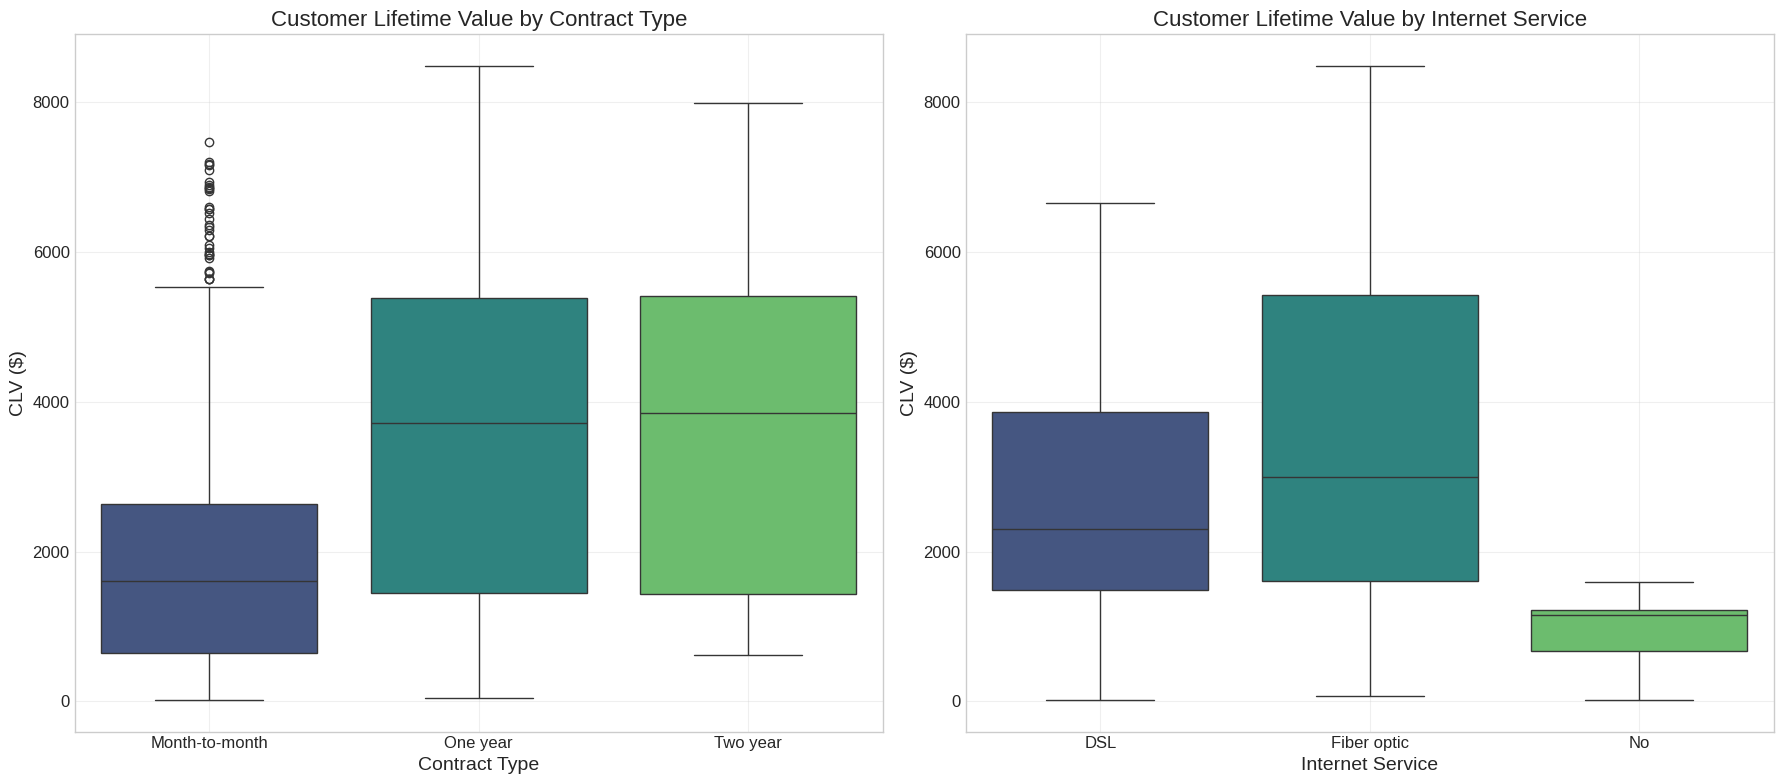


Average CLV by Contract Type:
Contract
Two year          3644.418555
One year          3633.391778
Month-to-month    1664.656080
Name: CLV, dtype: float64

Average CLV by Internet Service:
InternetService
Fiber optic    3302.317810
DSL            2560.924598
No             1019.556654
Name: CLV, dtype: float64

Top 5 Most Valuable Customer Segments:
                                      CLV  Count    TotalValue
CustomerSegment                                               
Month-to-month | Fiber optic  2133.130385   2128  4.539301e+06
One year | Fiber optic        5547.775865    539  2.990251e+06
Two year | Fiber optic        6280.706972    429  2.694423e+06
Two year | DSL                4224.544579    628  2.653014e+06
One year | DSL                3392.683147    570  1.933829e+06


# 10. Cohort Analysis


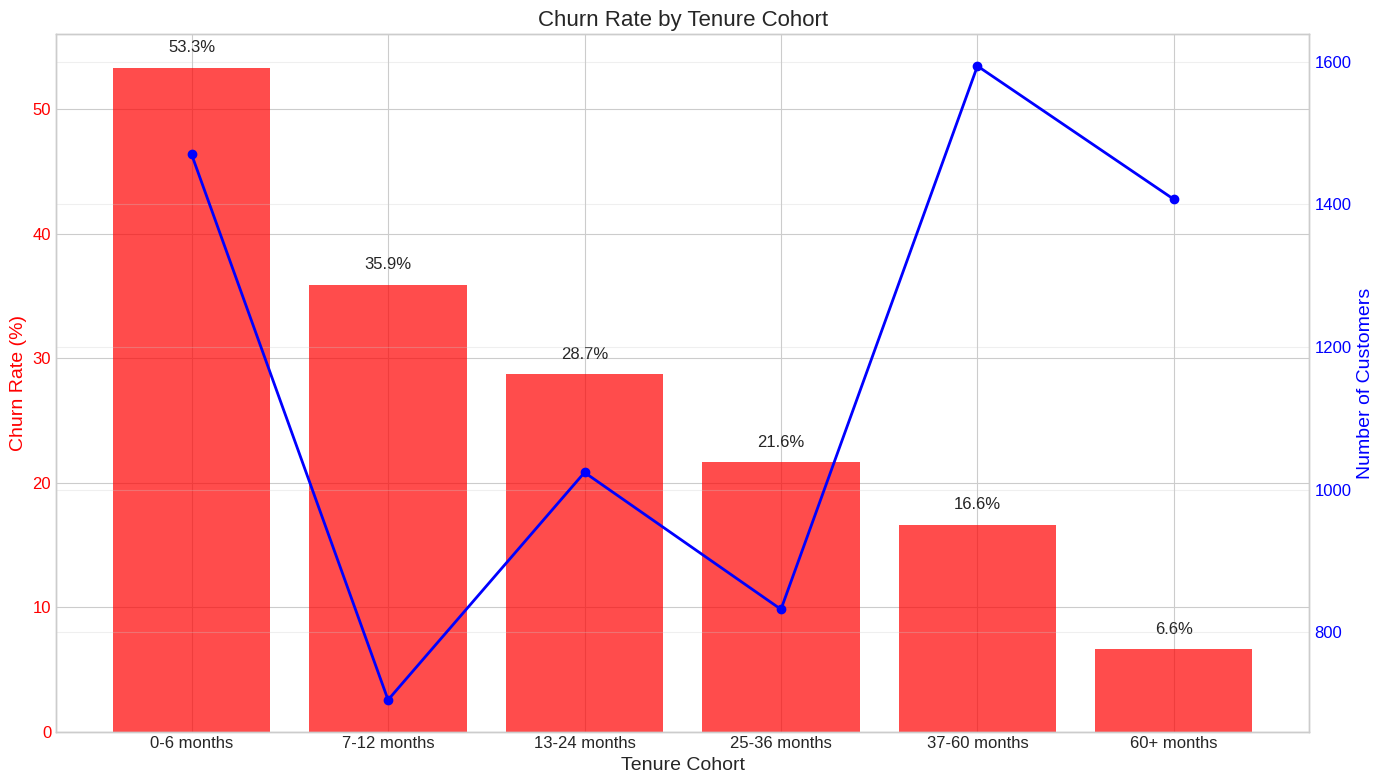


Analysis Complete!


In [8]:
# Telecom Customer Churn - Survival and Hazard Analysis
# ==================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from lifelines import KaplanMeierFitter, CoxPHFitter, LogNormalFitter
from lifelines.statistics import logrank_test
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Set aesthetic parameters for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("# 1. Loading and Exploring the Data")
print("=" * 40)

# Mount Google Drive (if you're using Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset
# Update this path to where your CSV file is located
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information about the dataset
print("\nDataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn names and data types:")
print(df.dtypes)

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nSummary statistics of numerical features:")
print(df.describe())

print("\nSummary of categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} distribution:")
    print(df[col].value_counts(normalize=True).round(3) * 100)

print("\nChecking for missing values:")
print(df.isnull().sum())

# 2. Data Preprocessing
print("\n\n# 2. Data Preprocessing")
print("=" * 40)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values if any
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

# Convert target variable 'Churn' to numeric
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create a flag for customers who have churned
df['Churned'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Print the number of churned and non-churned customers
churn_count = df['Churn'].value_counts()
print("\nChurn distribution:")
print(f"Churned customers: {churn_count.get('Yes', 0)} ({churn_count.get('Yes', 0)/len(df)*100:.2f}%)")
print(f"Retained customers: {churn_count.get('No', 0)} ({churn_count.get('No', 0)/len(df)*100:.2f}%)")

# 3. Exploratory Data Analysis (EDA)
print("\n\n# 3. Exploratory Data Analysis (EDA)")
print("=" * 40)

# Plot churn distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df, palette=['green', 'red'])
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()} ({p.get_height()/len(df)*100:.1f}%)',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'bottom', fontsize=12)
plt.grid(False)
plt.show()

# Analyze churn by categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots for each categorical variable
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 4, i+1)
    churn_rate = df.groupby(col)['Churned'].mean() * 100
    churn_rate.sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("viridis", len(churn_rate)))
    plt.title(f'Churn Rate by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylim(0, 100)

    # Add percentage labels on top of bars
    for j, p in enumerate(plt.gca().patches):
        plt.gca().annotate(f'{p.get_height():.1f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                         ha = 'center', fontsize=10)
plt.tight_layout()
plt.show()

# Analyze churn by numerical variables
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=['green', 'red'], element='step')
    plt.title(f'Distribution of {col} by Churn Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df, palette=['green', 'red'])
    plt.title(f'Boxplot of {col} by Churn Status', fontsize=14)
    plt.xlabel('Churn Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4. Advanced Churn Analysis
print("\n\n# 4. Advanced Churn Analysis")
print("=" * 40)

# Prepare data for predictive modeling
X = df.drop(['customerID', 'Churn', 'Churn_Binary', 'Churned'], axis=1)
y = df['Churn_Binary']

# Split data into categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Set up preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model for feature importance
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Get feature names after one-hot encoding
preprocessed_X_train = preprocessor.fit_transform(X_train)

# Get feature names after one-hot encoding
ohe = preprocessor.named_transformers_['cat']
categorical_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, categorical_feature_names])

# Get feature importances
importances = model.named_steps['classifier'].feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 20 Features Affecting Churn', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Survival Analysis
print("\n\n# 5. Survival Analysis")
print("=" * 40)

# Prepare data for survival analysis
# 'tenure' is the time variable (in months)
# 'Churned' is the event indicator (1=churned, 0=not churned)

# Initialize Kaplan-Meier model
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(df['tenure'], event_observed=df['Churned'], label='All Customers')

# Plot the survival curve
plt.figure(figsize=(12, 8))
kmf.plot_survival_function(color='blue')
plt.title('Overall Customer Survival Curve', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# Calculate median survival time
median_survival_time = kmf.median_survival_time_
print(f"\nMedian Survival Time (months): {median_survival_time:.2f}")

# Survival analysis by different groups
categorical_variables = ['Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

for feature in categorical_variables:
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    for category in df[feature].unique():
        mask = df[feature] == category
        kmf = KaplanMeierFitter()
        kmf.fit(df[mask]['tenure'], event_observed=df[mask]['Churned'], label=f'{feature}={category}')
        kmf.plot_survival_function(ax=ax)

    plt.title(f'Survival Curves by {feature}', fontsize=16)
    plt.xlabel('Tenure (Months)', fontsize=14)
    plt.ylabel('Survival Probability', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    plt.legend(loc='lower left', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Log-rank test for significance
    print(f"\nLog-rank test for {feature}:")
    categories = df[feature].unique()
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            cat1, cat2 = categories[i], categories[j]
            results = logrank_test(df[df[feature] == cat1]['tenure'],
                                  df[df[feature] == cat2]['tenure'],
                                  df[df[feature] == cat1]['Churned'],
                                  df[df[feature] == cat2]['Churned'])
            print(f"  {cat1} vs {cat2}: p-value = {results.p_value:.5f}")

# 6. Hazard Analysis
print("\n\n# 6. Hazard Analysis")
print("=" * 40)

# Calculate cumulative hazard function
print("\nCalculating Cumulative Hazard Function...")
kmf.fit(df['tenure'], event_observed=df['Churned'])
plt.figure(figsize=(12, 8))
kmf.plot_cumulative_density(color='red')
plt.title('Cumulative Hazard Function', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Cumulative Hazard', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate conditional probability of churn
# Group by tenure and calculate churn rates
tenure_groups = df.groupby('tenure').agg({'Churned': 'mean'})
tenure_groups['Churn_Rate'] = tenure_groups['Churned'] * 100
tenure_groups['Customer_Count'] = df.groupby('tenure').size()

# Plot conditional churn probability by tenure
plt.figure(figsize=(14, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot churn rate (hazard rate)
ax1.bar(tenure_groups.index, tenure_groups['Churn_Rate'], alpha=0.7, color='red', label='Churn Rate (%)')
ax1.set_xlabel('Tenure (Months)', fontsize=14)
ax1.set_ylabel('Churn Rate (%)', fontsize=14, color='red')
ax1.set_ylim(0, max(tenure_groups['Churn_Rate']) * 1.2)
ax1.tick_params(axis='y', labelcolor='red')

# Plot customer count
ax2.plot(tenure_groups.index, tenure_groups['Customer_Count'], 'b-', linewidth=2, label='Customer Count')
ax2.set_ylabel('Number of Customers', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title
plt.title('Conditional Churn Probability (Hazard Rate) by Tenure', fontsize=16)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cox Proportional Hazards model
print("\nFitting Cox Proportional Hazards Model...")

# Prepare data for Cox model
cox_data = df.copy()

# Identify and handle multicollinearity
# First, check correlation between numerical features
print("\nChecking correlation between numerical features:")
numerical_cols = ['MonthlyCharges', 'TotalCharges']
corr = cox_data[numerical_cols].corr()
print(corr)

# If high correlation (>0.9) between MonthlyCharges and TotalCharges, keep only one
if abs(corr.iloc[0, 1]) > 0.9:
    print("\nHigh correlation detected between MonthlyCharges and TotalCharges.")
    print("Keeping only MonthlyCharges to reduce collinearity.")
    numerical_cols = ['MonthlyCharges']  # Remove TotalCharges

# Select fewer categorical variables to reduce dimensionality
# Focus on the most important predictors of churn
key_categorical_cols = ['Contract', 'InternetService', 'OnlineSecurity',
                        'TechSupport', 'PaperlessBilling', 'PaymentMethod']

# Create dummy variables for categorical features
cox_data = pd.get_dummies(cox_data, columns=key_categorical_cols, drop_first=True)

# Keep only relevant columns
cox_columns = ['tenure'] + numerical_cols + ['SeniorCitizen', 'Churned'] + \
              [col for col in cox_data.columns if col.startswith(tuple(c + '_' for c in key_categorical_cols))]
cox_data = cox_data[cox_columns]

print(f"\nUsing {len(cox_columns) - 2} features for Cox model (excluding tenure and Churned)")

# Check for perfect separation
zero_var_cols = cox_data.var() == 0
if any(zero_var_cols):
    zero_var_names = zero_var_cols[zero_var_cols].index.tolist()
    print(f"\nRemoving {len(zero_var_names)} zero-variance columns: {zero_var_names}")
    cox_data = cox_data.drop(columns=zero_var_names)

try:
    # Try with penalization first (L2 regularization)
    print("\nFitting Cox model with L2 regularization...")
    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(cox_data, duration_col='tenure', event_col='Churned')

    # Print the model summary
    print("\nCox Proportional Hazards Model Summary (with regularization):")
    print(cph.summary)

    # Plot the hazard ratios
    plt.figure(figsize=(14, 10))
    cph.plot(hazard_ratios=True, alpha=0.8)
    plt.title('Hazard Ratios with 95% Confidence Intervals', fontsize=16)
    plt.axvline(x=1, color='red', linestyle='--', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate baseline survival and hazard functions
    baseline_survival = cph.baseline_survival_
    baseline_hazard = cph.baseline_hazard_

except Exception as e:
    print(f"\nRegularized Cox model failed: {str(e)}")
    print("\nTrying alternative approach: performing feature selection...")

    # If regularization fails, try feature selection using Random Forest importance
    from sklearn.ensemble import RandomForestClassifier

    # Prepare data for Random Forest
    X = cox_data.drop(['tenure', 'Churned'], axis=1)
    y = cox_data['Churned']

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns

    # Select top features (50% of original features or at least 3)
    n_features = max(3, int(len(features) * 0.5))
    top_features = [features[i] for i in indices[:n_features]]

    print(f"\nSelected top {n_features} features: {top_features}")

    # Create reduced dataset with only top features
    cox_data_reduced = cox_data[['tenure', 'Churned'] + top_features]

    # Try fitting the model with reduced features
    try:
        print("\nFitting Cox model with reduced features...")
        cph = CoxPHFitter(penalizer=0.1)
        cph.fit(cox_data_reduced, duration_col='tenure', event_col='Churned')

        # Print the model summary
        print("\nCox Proportional Hazards Model Summary (with reduced features):")
        print(cph.summary)

        # Plot the hazard ratios
        plt.figure(figsize=(14, 10))
        cph.plot(hazard_ratios=True, alpha=0.8)
        plt.title('Hazard Ratios with 95% Confidence Intervals (Reduced Features)', fontsize=16)
        plt.axvline(x=1, color='red', linestyle='--', alpha=0.3)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Calculate baseline survival and hazard functions
        baseline_survival = cph.baseline_survival_
        baseline_hazard = cph.baseline_hazard_

    except Exception as e2:
        print(f"\nReduced feature Cox model also failed: {str(e2)}")
        print("\nFalling back to non-parametric analysis only.")

        # Create placeholder for later code that might use cph
        class DummyCPH:
            def predict_expectation(self, X):
                return np.ones(len(X)) * df['tenure'].mean()

            def predict_survival_function(self, X):
                # Create a dummy survival function dataframe
                kmf = KaplanMeierFitter()
                kmf.fit(df['tenure'], event_observed=df['Churned'])
                return kmf.survival_function_

            def predict_median(self, X):
                # Return the overall median survival time
                kmf = KaplanMeierFitter()
                kmf.fit(df['tenure'], event_observed=df['Churned'])
                return np.ones(len(X)) * kmf.median_survival_time_

            def predict_hazard(self, X):
                # Create a dummy hazard function
                kmf = KaplanMeierFitter()
                kmf.fit(df['tenure'], event_observed=df['Churned'])
                return kmf.cumulative_hazard_

        cph = DummyCPH()

        print("\nUsing Kaplan-Meier estimates instead of Cox model.")
        # Plot non-parametric hazard function
        kmf = KaplanMeierFitter()
        kmf.fit(df['tenure'], event_observed=df['Churned'])

        plt.figure(figsize=(12, 8))
        kmf.plot_cumulative_hazard()
        plt.title('Non-Parametric Cumulative Hazard Function', fontsize=16)
        plt.xlabel('Tenure (Months)', fontsize=14)
        plt.ylabel('Cumulative Hazard', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Plot baseline hazard and survival functions
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
baseline_survival.plot()
plt.title('Baseline Survival Function', fontsize=16)
plt.xlabel('Timeline (Months)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

plt.subplot(1, 2, 2)
baseline_hazard.plot()
plt.title('Baseline Hazard Function', fontsize=16)
plt.xlabel('Timeline (Months)', fontsize=14)
plt.ylabel('Hazard', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Predicting Survival and Hazard for Different Customer Profiles
print("\n\n# 7. Predictive Survival Analysis")
print("=" * 40)

# Create sample customer profiles
profiles = pd.DataFrame({
    'profile_name': ['Month-to-Month, Fiber, High Charge', 'Two Year, DSL, Low Charge', 'Month-to-Month, No Internet', 'One Year, Fiber, Medium Charge'],
    'tenure': [3, 24, 12, 18],
    'MonthlyCharges': [90, 40, 30, 65],
    'TotalCharges': [90*3, 40*24, 30*12, 65*18],
    'SeniorCitizen': [0, 0, 1, 0],
    'Contract_One year': [0, 0, 0, 1],
    'Contract_Two year': [0, 1, 0, 0],
    'InternetService_Fiber optic': [1, 0, 0, 1],
    'InternetService_No': [0, 0, 1, 0],
    'PaperlessBilling_Yes': [1, 0, 0, 1],
    'PaymentMethod_Credit card (automatic)': [0, 0, 0, 1],
    'PaymentMethod_Electronic check': [1, 0, 0, 0],
    'PaymentMethod_Mailed check': [0, 1, 0, 0]
})

# Add all other dummy columns with zeros
for col in cox_data.columns:
    if col not in profiles.columns and col not in ['tenure', 'Churned']:
        profiles[col] = 0

# Calculate survival functions for each profile
plt.figure(figsize=(14, 8))

for i, profile_name in enumerate(profiles['profile_name']):
    profile_data = profiles.iloc[i:i+1].drop('profile_name', axis=1)
    sf = cph.predict_survival_function(profile_data)
    sf.plot(label=profile_name)

plt.title('Predicted Survival Functions for Different Customer Profiles', fontsize=16)
plt.xlabel('Timeline (Months)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# Calculate median survival times for each profile
print("\nPredicted Median Survival Times (months):")
for i, profile_name in enumerate(profiles['profile_name']):
    profile_data = profiles.iloc[i:i+1].drop('profile_name', axis=1)
    median_surv = cph.predict_median(profile_data)
    print(f"  {profile_name}: {float(median_surv):.2f}")

# Calculate hazard functions for each profile
plt.figure(figsize=(14, 8))

for i, profile_name in enumerate(profiles['profile_name']):
    profile_data = profiles.iloc[i:i+1].drop('profile_name', axis=1)

    # Use cumulative hazard instead (which is implemented)
    chf = cph.predict_cumulative_hazard(profile_data)
    chf.plot(label=f"{profile_name} (Cumulative)")

    # We can also estimate the hazard by taking the derivative of the cumulative hazard
    # This is an approximation of the hazard function
    times = chf.index.values
    cumhaz = chf.iloc[:, 0].values

    # Skip the first point for derivative calculation
    if len(times) > 5:  # Only calculate if we have enough points
        # Calculate first differences (approximation of derivative)
        hazard_approx = np.diff(cumhaz) / np.diff(times)
        # Plot at midpoints
        midpoints = (times[1:] + times[:-1]) / 2

        # Create a smoother curve using moving average
        window_size = min(5, len(hazard_approx))
        if window_size > 1:
            smoothed_hazard = np.convolve(hazard_approx, np.ones(window_size)/window_size, mode='valid')
            smoothed_midpoints = midpoints[window_size-1:]

            # Create a separate line for the hazard estimate with different style
            plt.plot(smoothed_midpoints, smoothed_hazard, '--',
                    alpha=0.7, label=f"{profile_name} (Hazard Estimate)")

plt.title('Predicted Cumulative Hazard Functions for Different Customer Profiles', fontsize=16)
plt.xlabel('Timeline (Months)', fontsize=14)
plt.ylabel('Cumulative Hazard', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Parametric Survival Models
print("\n\n# 8. Parametric Survival Models")
print("=" * 40)

# Check for zero tenure values
zero_tenures = (df['tenure'] == 0).sum()
if zero_tenures > 0:
    print(f"\nFound {zero_tenures} customers with zero tenure.")
    print("Adding a small positive value (0.1) to zero tenure values for parametric modeling.")
    # Create a copy of the tenure column with adjusted values
    adjusted_tenure = df['tenure'].copy()
    adjusted_tenure[adjusted_tenure == 0] = 0.1
else:
    adjusted_tenure = df['tenure']

# Fit Log-Normal model
print("\nFitting Log-Normal Survival Model...")
try:
    ln_model = LogNormalFitter()
    ln_model.fit(adjusted_tenure, event_observed=df['Churned'])

    # Plot fitted survival function
    plt.figure(figsize=(12, 8))
    kmf.fit(adjusted_tenure, event_observed=df['Churned'], label='Kaplan-Meier Estimate')
    kmf.plot_survival_function()
    ln_model.plot_survival_function(label='Log-Normal Fit')
    plt.title('Comparison of Non-Parametric and Parametric Survival Functions', fontsize=16)
    plt.xlabel('Tenure (Months)', fontsize=14)
    plt.ylabel('Survival Probability', fontsize=14)
    plt.legend(loc='lower left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

    # Print model parameters
    print("\nLog-Normal Model Parameters:")
    print(ln_model.summary)

    # Try fitting other parametric models for comparison
    print("\nFitting alternative parametric models for comparison...")
    from lifelines import WeibullFitter, ExponentialFitter

    # Fit Weibull model
    wb_model = WeibullFitter()
    wb_model.fit(adjusted_tenure, event_observed=df['Churned'])

    # Fit Exponential model
    exp_model = ExponentialFitter()
    exp_model.fit(adjusted_tenure, event_observed=df['Churned'])

    # Compare all models
    plt.figure(figsize=(12, 8))
    kmf.plot_survival_function(label='Kaplan-Meier (Non-parametric)')
    ln_model.plot_survival_function(label='Log-Normal')
    wb_model.plot_survival_function(label='Weibull')
    exp_model.plot_survival_function(label='Exponential')

    plt.title('Comparison of Different Parametric Survival Models', fontsize=16)
    plt.xlabel('Tenure (Months)', fontsize=14)
    plt.ylabel('Survival Probability', fontsize=14)
    plt.legend(loc='lower left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

    # Print AIC for model comparison
    print("\nModel Comparison (AIC - lower is better):")
    print(f"Log-Normal AIC: {ln_model.AIC_}")
    print(f"Weibull AIC: {wb_model.AIC_}")
    print(f"Exponential AIC: {exp_model.AIC_}")

    # Identify best model
    aic_values = {
        'Log-Normal': ln_model.AIC_,
        'Weibull': wb_model.AIC_,
        'Exponential': exp_model.AIC_
    }
    best_model = min(aic_values, key=aic_values.get)
    print(f"\nBest fitting model based on AIC: {best_model}")

except Exception as e:
    print(f"\nError fitting parametric models: {str(e)}")
    print("Skipping parametric survival analysis.")

# 9. Customer Lifetime Value Analysis
print("\n\n# 9. Customer Lifetime Value Analysis")
print("=" * 40)

# Calculate expected lifetime for different customer segments
print("\nExpected Customer Lifetime by Segment (months):")

# Function to calculate the restricted mean survival time manually
def calculate_rmst(kmf, t_horizon=60):
    """Calculate the restricted mean survival time up to t_horizon
    by numerical integration (area under the survival curve)"""
    sf = kmf.survival_function_
    times = sf.index.values
    survival_probs = sf.iloc[:, 0].values

    # Restrict to times <= t_horizon
    if max(times) < t_horizon:
        # If the max observed time is less than t_horizon, use max observed time
        t_horizon = max(times)

    # Filter times and probabilities to only include up to t_horizon
    mask = times <= t_horizon
    restricted_times = times[mask]
    restricted_probs = survival_probs[mask]

    # Add the final point at t_horizon if not already included
    if restricted_times[-1] < t_horizon:
        # Interpolate the survival probability at t_horizon
        from scipy import interpolate
        f = interpolate.interp1d(restricted_times, restricted_probs,
                                bounds_error=False, fill_value="extrapolate")
        restricted_times = np.append(restricted_times, t_horizon)
        restricted_probs = np.append(restricted_probs, f(t_horizon))

    # Calculate area under the curve (trapezoidal rule)
    # This is the restricted mean survival time
    rmst = np.trapz(restricted_probs, restricted_times)
    return rmst

# Contract type
for contract in df['Contract'].unique():
    df_segment = df[df['Contract'] == contract]
    kmf = KaplanMeierFitter()
    kmf.fit(df_segment['tenure'], event_observed=df_segment['Churned'])

    # Calculate restricted mean survival time up to 60 months
    rmst = calculate_rmst(kmf, t_horizon=60)
    print(f"  Contract={contract}: {rmst:.2f}")

# Internet Service type
print("\nExpected Customer Lifetime by Internet Service (months):")
for service in df['InternetService'].unique():
    df_segment = df[df['InternetService'] == service]
    kmf = KaplanMeierFitter()
    kmf.fit(df_segment['tenure'], event_observed=df_segment['Churned'])

    rmst = calculate_rmst(kmf, t_horizon=60)
    print(f"  InternetService={service}: {rmst:.2f}")

# Calculate expected CLV using estimated survival times
print("\nCalculating Customer Lifetime Value (CLV)...")

# Function to calculate expected lifetime for each customer
def calculate_expected_lifetime(row, max_time=60):
    """Calculate expected lifetime for a specific customer based on their characteristics"""
    # Use the Cox model if available, otherwise use segment averages
    if 'predict_expectation' in dir(cph) and callable(getattr(cph, 'predict_expectation')):
        try:
            # For the Cox model, we need to prepare data in the same format as the cox_data
            # This is simplified and might need adjustment based on your actual cox_data structure
            customer_data = pd.DataFrame([row])

            # Use segment-based estimate as fallback
            contract = row['Contract']
            df_segment = df[df['Contract'] == contract]
            kmf_segment = KaplanMeierFitter()
            kmf_segment.fit(df_segment['tenure'], event_observed=df_segment['Churned'])
            segment_lifetime = calculate_rmst(kmf_segment, t_horizon=max_time)

            # Set lifetime to actual tenure for churned customers
            if row['Churned'] == 1:
                return row['tenure']
            else:
                return segment_lifetime
        except Exception as e:
            print(f"Error calculating expected lifetime with Cox model: {str(e)}")
            # Fall back to overall average
            return df['tenure'].mean()
    else:
        # If no Cox model is available, use segment averages
        contract = row['Contract']
        df_segment = df[df['Contract'] == contract]
        kmf_segment = KaplanMeierFitter()
        kmf_segment.fit(df_segment['tenure'], event_observed=df_segment['Churned'])
        segment_lifetime = calculate_rmst(kmf_segment, t_horizon=max_time)

        # Set lifetime to actual tenure for churned customers
        if row['Churned'] == 1:
            return row['tenure']
        else:
            return segment_lifetime

# Apply the function to each row
df['ExpectedLifetime'] = df.apply(calculate_expected_lifetime, axis=1)
df['MonthlyRevenue'] = df['MonthlyCharges']
df['CLV'] = df['ExpectedLifetime'] * df['MonthlyRevenue']

# Print summary statistics of CLV
print("\nCustomer Lifetime Value Summary Statistics:")
print(df['CLV'].describe())

# Analyze CLV by different segments
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Contract', y='CLV', data=df, palette='viridis')
plt.title('Customer Lifetime Value by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('CLV ($)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(x='InternetService', y='CLV', data=df, palette='viridis')
plt.title('Customer Lifetime Value by Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('CLV ($)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate average CLV by customer segments
print("\nAverage CLV by Contract Type:")
print(df.groupby('Contract')['CLV'].mean().sort_values(ascending=False))

print("\nAverage CLV by Internet Service:")
print(df.groupby('InternetService')['CLV'].mean().sort_values(ascending=False))

print("\nTop 5 Most Valuable Customer Segments:")
# Combine key factors to create segments
df['CustomerSegment'] = df['Contract'] + " | " + df['InternetService']
segment_clv = df.groupby('CustomerSegment').agg({
    'CLV': 'mean',
    'customerID': 'count'
}).rename(columns={'customerID': 'Count'})
segment_clv['TotalValue'] = segment_clv['CLV'] * segment_clv['Count']
print(segment_clv.sort_values('TotalValue', ascending=False).head(5))

# 10. Cohort Analysis
print("\n\n# 10. Cohort Analysis")
print("=" * 40)

# Group customers by tenure cohorts
df['Tenure_Cohort'] = pd.cut(df['tenure'],
                            bins=[0, 6, 12, 24, 36, 60, float('inf')],
                            labels=['0-6 months', '7-12 months', '13-24 months',
                                   '25-36 months', '37-60 months', '60+ months'])

# Calculate churn rate by cohort
cohort_churn = df.groupby('Tenure_Cohort').agg({
    'Churned': 'mean',
    'customerID': 'count'
}).rename(columns={'Churned': 'Churn_Rate', 'customerID': 'Customer_Count'})

cohort_churn['Churn_Rate'] = cohort_churn['Churn_Rate'] * 100

# Plot churn rate by tenure cohort
plt.figure(figsize=(14, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot churn rate
bars = ax1.bar(cohort_churn.index, cohort_churn['Churn_Rate'], alpha=0.7, color='red')
ax1.set_xlabel('Tenure Cohort', fontsize=14)
ax1.set_ylabel('Churn Rate (%)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot customer count
line = ax2.plot(cohort_churn.index, cohort_churn['Customer_Count'], 'b-', marker='o', linewidth=2)
ax2.set_ylabel('Number of Customers', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add data labels to bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Churn Rate by Tenure Cohort', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAnalysis Complete!")